# BA Ecobici - Modelo de Predicción de Duración de un Viaje 

Para el siguiente trabajo utilizaremos datos públicos del sistema de Ecobicis de la Ciudad Autónoma de Buenos Aires, disponibles en https://data.buenosaires.gob.ar/. Partiendo de datasets que contienen información de cada uno de los viajes realizados utilizando el sistema de Ecobicis, y agregando a los mismos información relevante sobre el usuario o viajante, buscaremos analizar algunos de los aspectos más relevantes del servicio, tales como la evolución de la cantidad de viajes a lo largo del tiempo, las principales estaciones y la distribución de la duración de los viajes, entre otras. Una vez analizado el contexto de los datos, armaremos un modelo que intente predecir la duración de un viaje en Ecobici basado en las condiciones en las que se realizó el mismo. 

In [1]:
#Importamos las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [2]:
#Importamos los dataset de ciudad de buenos aires de recorridos 2018, 2019 y 2020
recorridos2018 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2018.csv', delimiter=',',low_memory=False)
recorridos2019 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2019.csv', delimiter=',',low_memory=False)
recorridos2020 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\recorridos-realizados-2020.csv', delimiter=',',low_memory=False)
#recorridos2018 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\recorridos-realizados-2018.csv', delimiter=',',low_memory=False)
#recorridos2019 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\recorridos-realizados-2019.csv', delimiter=',',low_memory=False)
#recorridos2020 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\recorridos-realizados-2020.csv', delimiter=',',low_memory=False)

In [3]:
#Vamos a ver las features del dataset 2018
recorridos2018

,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino
0,5453,M,2018-01-01 00:08:05,45.0,Uruguay,-58.386913,-34.601616,Tucumán y Uruguay,0 days 00:19:53.000000000,2018-01-01 00:27:58,183.0,Virrey Cevallos,-58.389692,-34.615638,México 1652 entre Virrey Cevallos y Solís
1,673,M,2018-01-01 00:18:05,189.0,Posadas,-58.385586,-34.588475,Posadas 1350 entre Montevideo y Rodríguez Peña,0 days 00:26:19.000000000,2018-01-01 00:44:24,110.0,Guardia Vieja,-58.415459,-34.601761,Guardia Vieja 3606 entre Billinghurst y Mario ...
2,179119,F,2018-01-01 00:20:14,50.0,Hospital Rivadavia,-58.401148,-34.583677,Lucena Pereyra 2516 entre Las Heras y Pagano,0 days 00:27:39.000000000,2018-01-01 00:47:53,31.0,Padilla,-58.439709,-34.603162,Padilla y Warnes Av
3,400147,M,2018-01-01 00:20:22,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:48:51.000000000,2018-01-01 01:09:13,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
4,400156,F,2018-01-01 00:20:31,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:49:27.000000000,2018-01-01 01:09:58,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,190597,M,2018-12-30 19:46:32,75.0,Plaza Primero de Mayo,-58.398905,-34.612124,Pichincha entre Adolfo Alsina y Moreno,0 days 00:07:15.000000000,2018-12-30 19:53:47,118.0,México,-58.402827,-34.616813,Saavedra y México
2619964,119885,F,2018-12-30 19:48:14,139.0,Virrey Liniers,-58.413150,-34.633309,Salcedo 3401 y Virrey Liniers,0 days 00:09:59.000000000,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,-58.415882,-34.622439,Estados Unidos 3568 entre Boedo y Maza
2619965,652034,F,2018-12-30 19:48:51,30.0,Peña,-58.397378,-34.590394,Azcuénaga y Peña,0 days 00:10:32.000000000,2018-12-30 19:59:23,76.0,Ayacucho,-58.394927,-34.607573,Ayacucho entre Perón Juan y Bartolomé Mitre
2619966,467438,M,2018-12-30 19:51:42,52.0,Sánchez de Bustamante,-58.414668,-34.607089,Sánchez de Bustamante y Perón Juan,0 days 00:09:57.000000000,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,-58.414668,-34.607089,Sánchez de Bustamante y Perón Juan


Como cada registro de la tabla representa un viaje, vemos que tenemos 2.619.698 viajes para el año 2018. Por cada uno de ellos tenemos información del id del usuario que realizó el viaje, su género, la fecha de origen del recorrido, el id o código identificatorio de la estación de origen, de esta última su nombre, la latitud y longitud de su ubicación y su domicilio; luego información de la duración del recorrido y fecha de finalización del viaje, disponiendo además de la misma información antes mencionada para la estación de destino del viaje. 

In [4]:
#Vamos a ver las features del dataset 2019
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,0 days 00:07:02.000000000,2019-01-01 00:08:18,112.0,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,0 days 00:05:33.000000000,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:45.000000000,2019-01-01 00:29:00,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:34.000000000,2019-01-01 00:29:02,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,0 days 00:21:32.000000000,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:13:58.000000000,2019-11-16 16:59,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:26:56.000000000,2019-11-24 13:51,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:25:06.000000000,2019-12-22 13:54,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:23:43.000000000,2019-12-18 14:04,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo


El dataset de 2019 a grandes rasgos tiene la misma información que el de 2018, pero además tiene la edad del usuario, información sobre la capacidad de bicicletas de las estaciones de origen y destino y una columna llamada servicio. El dataset tiene 6 millones de registros, más del doble que el año anterior! Ya volveremos para analizar este punto. 

In [5]:
#Vamos a ver las features del dataset 2020
recorridos2020

,Unnamed: 0,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista
0,0.0,349,75,2020-09-14 11:52:21,075 - Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,186 - MANZANA 66,155721
1,1.0,85,210,2020-09-14 11:51:41,335 - General Urquiza,2020-09-14 11:53:06,210.0,335 - General Urquiza,191320
2,2.0,311,213,2020-09-14 11:51:12,136 - Acevedo,2020-09-14 11:56:23,99.0,099 - Malabia,86663
3,3.0,454,156,2020-09-14 11:50:38,156 - Plaza Alemania,2020-09-14 11:58:12,222.0,160 - Godoy Cruz y Libertador,193914
4,4.0,195,24,2020-09-14 11:49:31,024 - ALSINA,2020-09-14 11:52:46,441.0,016 - Legislatura,448950
...,...,...,...,...,...,...,...,...,...
1438850,NaN,1089,9,2020-05-11 10:14:47,009 - Parque Las Heras,2020-05-11 10:32:56,9.0,009 - Parque Las Heras,5368
1438851,NaN,290,104,2020-05-11 07:54:14,104 - Federico Lacroze,2020-05-11 07:59:04,127.0,127 - SANTOS DUMONT Y OTERO,250224
1438852,NaN,2,206,2020-03-21 18:53:26,159 - Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,287 - Belaustegui,60667
1438853,NaN,2,206,2020-03-21 13:16:27,159 - Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,159 - Fitz Roy & Gorriti,60667


El dataset tiene menos features, ahora sólo tenemos información sobre la duración en segundos, la fecha de inicio y fin de viaje, y los id y nombres de estaciones origen y destino, además del id del ciclista. Contiene datos hasta septiembre del 2020. 

Antes de comenzar a analizar los viajes, nos parece interesante poder visualizar las estaciones en un mapa de la ciudad. Para ello importaremos un dataset de estaciones, también confeccionado a partir de datos de https://data.buenosaires.gob.ar/. Es preciso destacar que este mapa contiene todas las estaciones que alguna vez tuvo el sistema, que puede no coincidir con las actuales a Noviembre 2020. 

In [6]:
estaciones = pd.read_excel(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\estacionesbicicletasfull.xlsx')
#estaciones = pd.read_excel(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp\estacionesbicicletasfull.xlsx')
estaciones

,lat,long,id_estacion,capacidad,Nombre,barrio
0,-34.583133,-58.392452,1,0,Facultad de Derecho,Recoleta
1,-34.592589,-58.374822,2,0,Retiro,Retiro
2,-34.611032,-58.368260,3,20,ADUANA,Monserrat
3,-34.601726,-58.368763,4,20,Plaza Roma,San nicolas
4,-34.580550,-58.420954,5,42,Plaza Italia,Palermo
...,...,...,...,...,...,...
266,-34.544597,-58.459554,435,16,lub Ciudad de,NuÃ±ez
267,-34.610012,-58.374919,441,20,Legislatura,Monserrat
268,-34.608678,-58.371008,444,24,nisterio de Ec,San nicolas
269,-34.582618,-58.378731,448,24,Barrio 31,Retiro


In [7]:
#Importamos librerias para crear mapa con estaciones
import warnings
warnings.filterwarnings('ignore')

In [8]:
! pip install folium
import folium

In [9]:
#Creamos el mapa con folium
mapa = folium.Map(location=[-34.588889, -58.430556], zoom_start=13)

In [10]:
import folium
from folium.plugins import FastMarkerCluster

In [11]:
#Agregamos los marcadores
for index, row in estaciones.iterrows():
       tooltip = row['Nombre']
for index, row in estaciones.iterrows():
    folium.Marker(location=(row['lat'],row['long']),popup=row['Nombre'],
       tooltip=row['Nombre']).add_to(mapa)

In [12]:
mapa

# Limpieza de los Datos

Ahora sí vamos a comenzar a trabajar con los recorridos. Nuestro primer objetivo es crear una tabla con todos ellos para poder obtener información relevante sobre la evolución del servicio a lo largo de los años. 

In [13]:
#Vamos con la tabla de recorridos 2018
recorridos2018

,id_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,long_estacion_origen,lat_estacion_origen,domicilio_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,long_estacion_destino,lat_estacion_destino,domicilio_estacion_destino
0,5453,M,2018-01-01 00:08:05,45.0,Uruguay,-58.386913,-34.601616,Tucumán y Uruguay,0 days 00:19:53.000000000,2018-01-01 00:27:58,183.0,Virrey Cevallos,-58.389692,-34.615638,México 1652 entre Virrey Cevallos y Solís
1,673,M,2018-01-01 00:18:05,189.0,Posadas,-58.385586,-34.588475,Posadas 1350 entre Montevideo y Rodríguez Peña,0 days 00:26:19.000000000,2018-01-01 00:44:24,110.0,Guardia Vieja,-58.415459,-34.601761,Guardia Vieja 3606 entre Billinghurst y Mario ...
2,179119,F,2018-01-01 00:20:14,50.0,Hospital Rivadavia,-58.401148,-34.583677,Lucena Pereyra 2516 entre Las Heras y Pagano,0 days 00:27:39.000000000,2018-01-01 00:47:53,31.0,Padilla,-58.439709,-34.603162,Padilla y Warnes Av
3,400147,M,2018-01-01 00:20:22,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:48:51.000000000,2018-01-01 01:09:13,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
4,400156,F,2018-01-01 00:20:31,111.0,Macacha Güemes,-58.363000,-34.604969,Macacha Guemes y Juana Manso,0 days 00:49:27.000000000,2018-01-01 01:09:58,54.0,Acuña de Figueroa,-58.421705,-34.598222,Lavalle y Acuña de Figueroa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,190597,M,2018-12-30 19:46:32,75.0,Plaza Primero de Mayo,-58.398905,-34.612124,Pichincha entre Adolfo Alsina y Moreno,0 days 00:07:15.000000000,2018-12-30 19:53:47,118.0,México,-58.402827,-34.616813,Saavedra y México
2619964,119885,F,2018-12-30 19:48:14,139.0,Virrey Liniers,-58.413150,-34.633309,Salcedo 3401 y Virrey Liniers,0 days 00:09:59.000000000,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,-58.415882,-34.622439,Estados Unidos 3568 entre Boedo y Maza
2619965,652034,F,2018-12-30 19:48:51,30.0,Peña,-58.397378,-34.590394,Azcuénaga y Peña,0 days 00:10:32.000000000,2018-12-30 19:59:23,76.0,Ayacucho,-58.394927,-34.607573,Ayacucho entre Perón Juan y Bartolomé Mitre
2619966,467438,M,2018-12-30 19:51:42,52.0,Sánchez de Bustamante,-58.414668,-34.607089,Sánchez de Bustamante y Perón Juan,0 days 00:09:57.000000000,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,-58.414668,-34.607089,Sánchez de Bustamante y Perón Juan


In [14]:
#Pasamos la columna de duracion a segundos
recorte18  = recorridos2018['duracion_recorrido'].str.split(" ", n=2, expand=True)
duracion018=recorte18[2]
duracion18=duracion018.str.slice(stop=8)
#Nos quedamos solo con lo que es tiempo, ya que con una limitante de 2 hs por viaje, si uno llegara a durar 1 día será un outlier. 
duracion18

0          00:19:53
1          00:26:19
2          00:27:39
3          00:48:51
4          00:49:27
             ...   
2619963    00:07:15
2619964    00:09:59
2619965    00:10:32
2619966    00:09:57
2619967    00:10:26
Name: 2, Length: 2619968, dtype: object

In [15]:
#Extraemos minutos horas y segundos y los agregamos a la tabla
minutos18=duracion18.str.slice(start=3, stop=5)
horas18=duracion18.str.slice(stop=2)
segundos18=duracion18.str.slice(start=6,stop=8)
recorridos2018['dur_hs']=horas18
recorridos2018['dur_min']=minutos18
recorridos2018['dur_seg']=segundos18

In [16]:
#Ordenamos el dataset y nos quedamos solo con aquellas features que compartían los 3 sets, dado que buscaremos armar una tabla que consolide los tres años
recorridos2018reor = recorridos2018[['dur_hs','dur_min','dur_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']]
recorridos2018reor

,dur_hs,dur_min,dur_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,00,19,53,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,00,26,19,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,00,27,39,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,00,48,51,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,00,49,27,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...,...,...
2619963,00,07,15,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597
2619964,00,09,59,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885
2619965,00,10,32,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034
2619966,00,09,57,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438


In [17]:
#Vemos la cantidad de nulos que tiene el dataset recorridos2018reor
percent2018 = (recorridos2018reor.isnull().sum()/recorridos2018reor.isnull().count()).sort_values(ascending=False)
percent2018.head(20)

fecha_destino_recorrido    0.016688
dur_seg                    0.016688
dur_min                    0.016688
dur_hs                     0.016688
id_estacion_destino        0.011636
id_estacion_origen         0.011536
id_usuario                 0.000000
nombre_estacion_destino    0.000000
nombre_estacion_origen     0.000000
fecha_origen_recorrido     0.000000
dtype: float64

In [18]:
#Dado que representan el 1,5% de los datos, decidimos eliminarlos
recorridos2018limpio=recorridos2018reor.dropna()

In [19]:
#Pasamos las columnas de minutos, horas y segundos a enteros 
recorridos2018limpio['dur_hs_int'] = recorridos2018limpio['dur_hs'].astype(int)
recorridos2018limpio['dur_min_int'] = recorridos2018limpio['dur_min'].astype(int)
recorridos2018limpio['dur_seg_int'] = recorridos2018limpio['dur_seg'].astype(int)


In [20]:
#Ahora si podemos multiplicar las horas, minutos y sumar segundos para la duracion total
recorridos2018limpio['duracion_tot_seg'] = recorridos2018limpio['dur_min_int'].apply(lambda x: x*60) + recorridos2018limpio['dur_seg_int'] + recorridos2018limpio['dur_hs_int'].apply(lambda x: x*3600)

In [21]:
#Ordenamos y nos quedamos con el dataset final
recorridos2018final=recorridos2018limpio[['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']]
recorridos2018final

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario
0,1193,45.0,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183.0,Virrey Cevallos,5453
1,1579,189.0,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110.0,Guardia Vieja,673
2,1659,50.0,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31.0,Padilla,179119
3,2931,111.0,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54.0,Acuña de Figueroa,400147
4,2967,111.0,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54.0,Acuña de Figueroa,400156
...,...,...,...,...,...,...,...,...
2619963,435,75.0,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118.0,México,190597
2619964,599,139.0,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199.0,Estados Unidos y Boedo,119885
2619965,632,30.0,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76.0,Ayacucho,652034
2619966,597,52.0,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52.0,Sánchez de Bustamante,467438


In [22]:
#Vamos con los id
recorridos2018final['id_estacion_destino'].dtype
recorridos2018final['id_estacion_origen'].dtype

dtype('float64')

In [23]:
#Son float pero vamos a pasarlos a enteros
recorridos2018final['id_estacion_destino_int'] =recorridos2018final['id_estacion_destino'].astype(np.int64)
recorridos2018final['id_estacion_origen_int'] =recorridos2018final['id_estacion_origen'].astype(np.int64)
recorridos2018final=recorridos2018final.drop(columns=['id_estacion_origen'])
recorridos2018final=recorridos2018final.drop(columns=['id_estacion_destino'])

In [24]:
#Reordeno
recorridos2018final=recorridos2018final[['duracion_tot_seg','id_estacion_origen_int','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino_int','nombre_estacion_destino','id_usuario',]]
recorridos2018final.shape

(2520545, 8)

In [25]:
#Unificamos nombres de columnas
recorridos2018final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']

In [26]:
#Agregamos info de las estaciones
#Primero las estaciones de origen
recorridos2018final=recorridos2018final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2018final.rename(columns={'barrio': 'barrio_origen', 'capacidad': 'capacidad_origen','lat':'lat_origen','long':'long_origen'},inplace=True)

In [27]:
#Droppeamos el id estacion para que no se duplique la feature
recorridos2018final=recorridos2018final.drop(columns=['id_estacion'])

In [28]:
recorridos2018final.shape

(2520545, 12)

In [29]:
#Ahora vamos con la estacion de destino
recorridos2018_total=recorridos2018final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_destino'], right_on=['id_estacion'])
recorridos2018_total.rename(columns={'barrio': 'barrio_destino', 'capacidad': 'capacidad_destino','lat':'lat_destino','long':'long_destino'},inplace=True)


In [30]:
recorridos2018_total.shape

(2520545, 17)

In [31]:
recorridos2018_total=recorridos2018_total.drop(columns=['id_estacion'])


In [32]:
#El df ya mergeado entre recorridos y estaciones tanto de origen como de destino
recorridos2018_total.shape

(2520545, 16)

In [33]:
nulos2018estaciones = (recorridos2018_total.isnull().sum()/recorridos2018_total.isnull().count()).sort_values(ascending=False)
nulos2018estaciones

long_destino               0.0
lat_destino                0.0
capacidad_destino          0.0
barrio_destino             0.0
long_origen                0.0
lat_origen                 0.0
capacidad_origen           0.0
barrio_origen              0.0
id_usuario                 0.0
nombre_estacion_destino    0.0
id_estacion_destino        0.0
fecha_destino_recorrido    0.0
nombre_estacion_origen     0.0
fecha_origen_recorrido     0.0
id_estacion_origen         0.0
duracion_tot_seg           0.0
dtype: float64

In [34]:
#Importamos un calendario para saber en que dia de la semana se encuentra cada fecha y si es día laborable (lun-vie) o no (sab-dom)
calendario = pd.read_excel(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\TablaCalendario.xlsx')
#calendario = pd.read_excel(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\TP_ECOBICIS_2610\TablaCalendario.xlsx')
calendario

,DiaSem,Fecha,DiaLab
0,Lunes,2018-01-01,1
1,Martes,2018-01-02,1
2,Miercoles,2018-01-03,1
3,Jueves,2018-01-04,1
4,Viernes,2018-01-05,1
...,...,...,...
1091,Domingo,2020-12-27,0
1092,Lunes,2020-12-28,1
1093,Martes,2020-12-29,1
1094,Miercoles,2020-12-30,1


In [35]:
#Unimos el dataet de recorridos 2018 con el calendario
recorridos2018_total['Fecha_str']=recorridos2018_total['fecha_origen_recorrido'].apply(str).str.slice(stop=10)
recorridos2018_total = recorridos2018_total.merge(calendario, how= 'left' , left_on = ['Fecha_str'], right_on=['Fecha'])
recorridos2018_total=recorridos2018_total.drop(columns=['Fecha'])
recorridos2018_total

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,nombre_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,barrio_destino,capacidad_destino,lat_destino,long_destino,Fecha_str,DiaSem,DiaLab
0,1193,45,2018-01-01 00:08:05,Uruguay,2018-01-01 00:27:58,183,Virrey Cevallos,5453,San nicolas,20,-34.601864,-58.386693,Monserrat,20,-34.615699,-58.389973,2018-01-01,Lunes,1
1,1579,189,2018-01-01 00:18:05,Posadas,2018-01-01 00:44:24,110,Guardia Vieja,673,Retiro,20,-34.588689,-58.385211,Almagro,0,-34.601761,-58.415459,2018-01-01,Lunes,1
2,1659,50,2018-01-01 00:20:14,Hospital Rivadavia,2018-01-01 00:47:53,31,Padilla,179119,Palermo,20,-34.583735,-58.401080,Villa crespo,0,-34.603162,-58.439709,2018-01-01,Lunes,1
3,2931,111,2018-01-01 00:20:22,Macacha Güemes,2018-01-01 01:09:13,54,Acuña de Figueroa,400147,Puerto madero,0,-34.604969,-58.363000,Almagro,20,-34.598118,-58.421984,2018-01-01,Lunes,1
4,2967,111,2018-01-01 00:20:31,Macacha Güemes,2018-01-01 01:09:58,54,Acuña de Figueroa,400156,Puerto madero,0,-34.604969,-58.363000,Almagro,20,-34.598118,-58.421984,2018-01-01,Lunes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520540,435,75,2018-12-30 19:46:32,Plaza Primero de Mayo,2018-12-30 19:53:47,118,México,190597,Balvanera,20,-34.612298,-58.398987,Balvanera,0,-34.616813,-58.402827,2018-12-30,Domingo,0
2520541,599,139,2018-12-30 19:48:14,Virrey Liniers,2018-12-30 19:58:13,199,Estados Unidos y Boedo,119885,Boedo,0,-34.633309,-58.413150,Boedo,20,-34.622260,-58.416014,2018-12-30,Domingo,0
2520542,632,30,2018-12-30 19:48:51,Peña,2018-12-30 19:59:23,76,Ayacucho,652034,Recoleta,20,-34.590821,-58.397370,Balvanera,20,-34.607408,-58.395055,2018-12-30,Domingo,0
2520543,597,52,2018-12-30 19:51:42,Sánchez de Bustamante,2018-12-30 20:01:39,52,Sánchez de Bustamante,467438,Almagro,0,-34.607089,-58.414668,Almagro,0,-34.607089,-58.414668,2018-12-30,Domingo,0


In [36]:
#Vamos a armar una columna para año, mes, dia y franja horaria del viaje por separado, considerando la fecha de origen
recorridos2018_total.fecha_origen_recorrido = pd.to_datetime(recorridos2018_total.fecha_origen_recorrido) 
recorridos2018_total['anio'] = recorridos2018_total.fecha_origen_recorrido.dt.year
recorridos2018_total['mes'] = recorridos2018_total.fecha_origen_recorrido.dt.month
recorridos2018_total['dia'] = recorridos2018_total.fecha_origen_recorrido.dt.day
recorridos2018_total['franja_horaria'] = recorridos2018_total.fecha_origen_recorrido.dt.hour 

In [37]:
#Vamos a dejar una columna con el año y mes como string para poder armar luego una visualización
recorridos2018_total['aniomes'] = recorridos2018_total['anio'].apply(str) +'-'+recorridos2018_total['mes'].apply(str)

In [38]:
#Vamos a unificar los nombres de estaciones origen y destino todos a minuscula
recorridos2018_total["nombre_estacion_origen_min"] = recorridos2018_total["nombre_estacion_origen"].str.lower()
recorridos2018_total["nombre_estacion_destino_min"]= recorridos2018_total["nombre_estacion_destino"].str.lower()
recorridos2018_total=recorridos2018_total.drop(columns=['nombre_estacion_origen','nombre_estacion_destino'])

In [39]:
recorridos2018_total.shape

(2520545, 24)

In [40]:
#Vamos con 2019
recorridos2019

,id_usuario,edad_usuario,genero_usuario,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,capacidad_estacion_origen,lat_estacion_origen,long_estacion_origen,duracion_recorrido,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,capacidad_estacion_destino,lat_estacion_destino,long_estacion_destino,servicio
0,115783_0,36.0,FEMENINO,2019-01-01 00:01:16,168.0,Estados Unidos,Estados Unidos y Lima,NaN,-34.618620,-58.381283,0 days 00:07:02.000000000,2019-01-01 00:08:18,112.0,9 de Julio,9 de Julio y Moreno,NaN,-34.612389,-58.380766,antiguo
1,345364_0,40.0,MASCULINO,2019-01-01 00:04:32,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,0 days 00:05:33.000000000,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,Bolivar entre Adolfo Alsina y Moreno,NaN,-34.610782,-58.373557,antiguo
2,570578_0,41.0,FEMENINO,2019-01-01 00:09:15,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:45.000000000,2019-01-01 00:29:00,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
3,588687_0,43.0,MASCULINO,2019-01-01 00:09:28,144.0,Pueyrredón,Boulogne Sur Mer y Tucuman,NaN,-34.601780,-58.405790,0 days 00:19:34.000000000,2019-01-01 00:29:02,44_0,Ecoparque,NaN,NaN,NaN,NaN,antiguo
4,127201_0,33.0,MASCULINO,2019-01-01 00:11:17,16.0,Legislatura,Perú y Diagonal Sur,NaN,-34.609959,-58.374717,0 days 00:21:32.000000000,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,Estados Unidos 3568 entre Boedo y Maza,NaN,-34.622439,-58.415882,antiguo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367309,501986,NaN,NaN,2019-11-16 16:45,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:13:58.000000000,2019-11-16 16:59,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367310,352570,NaN,NaN,2019-11-24 13:24,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:26:56.000000000,2019-11-24 13:51,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367311,352570,NaN,NaN,2019-12-22 13:29,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:25:06.000000000,2019-12-22 13:54,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo
6367312,352570,NaN,NaN,2019-12-18 13:40,300.0,321 - PERITO MORENO,"Fernandez De La Cruz, F., Gral. Av. y Erezcano",20.0,-34.651392,-58.432729,0 days 00:23:43.000000000,2019-12-18 14:04,283.0,228 - BALDOMERO,"Fernandez Moreno, Baldomero 2289",20.0,-34.635505,-58.456035,antiguo


In [41]:
##Corregir ID usuarios con _0
recorteid  = recorridos2019['id_usuario'].str.split("_", n=2, expand=True) 
recorridos2019['id_usuario_c']=recorteid[0]

##Corregir ID estaciones con _0
recorteiddestino=recorridos2019['id_estacion_destino'].str.split("_", n=2, expand=True) 
recorridos2019['id_estacion_destino_c']=recorteiddestino[0]
recorteidorigen=recorridos2019['id_estacion_origen'].str.split("_", n=2, expand=True) 
recorridos2019['id_estacion_origen_c']=recorteidorigen[0]

In [42]:
#Dejar solo texto en nombres estaciones con numero -
recorte_estorigen=recorridos2019['nombre_estacion_origen'].str.split("-",n=1,expand=True)
recorte_estorigen['largo']=recorte_estorigen[0].str.len()
recorte_estorigen

,0,1,largo
0,Estados Unidos,None,14.0
1,Colegio Nacional Buenos Aires,None,29.0
2,Pueyrredón,None,10.0
3,Pueyrredón,None,10.0
4,Legislatura,None,11.0
...,...,...,...
6367309,321,PERITO MORENO,4.0
6367310,321,PERITO MORENO,4.0
6367311,321,PERITO MORENO,4.0
6367312,321,PERITO MORENO,4.0


In [43]:
#Creamos una única columna que conserve el nombre, usamos el largo del texto para entender cuando hay un nro y cuando una palabra
recorte_estorigen.loc[recorte_estorigen['largo']==4, 'final'] = recorte_estorigen[1]
recorte_estorigen.loc[recorte_estorigen['largo']!=4, 'final'] = recorte_estorigen[0]
recorte_estorigen

,0,1,largo,final
0,Estados Unidos,None,14.0,Estados Unidos
1,Colegio Nacional Buenos Aires,None,29.0,Colegio Nacional Buenos Aires
2,Pueyrredón,None,10.0,Pueyrredón
3,Pueyrredón,None,10.0,Pueyrredón
4,Legislatura,None,11.0,Legislatura
...,...,...,...,...
6367309,321,PERITO MORENO,4.0,PERITO MORENO
6367310,321,PERITO MORENO,4.0,PERITO MORENO
6367311,321,PERITO MORENO,4.0,PERITO MORENO
6367312,321,PERITO MORENO,4.0,PERITO MORENO


In [44]:
#Lo agregamos al dataset
recorridos2019['nombre_estacion_origen_c']=recorte_estorigen['final']

In [45]:
#Mismo proceso con los nombres de estaciones de destino
recorte_estdestino=recorridos2019['nombre_estacion_destino'].str.split("-",n=1,expand=True)
recorte_estdestino['largod']=recorte_estdestino[0].str.len()
recorte_estdestino.loc[recorte_estdestino['largod']==4, 'finald'] = recorte_estdestino[1]
recorte_estdestino.loc[recorte_estdestino['largod']!=4, 'finald'] = recorte_estdestino[0]
recorridos2019['nombre_estacion_destino_c']=recorte_estdestino['finald']

In [46]:
#Pasamos la columna de duracion a segundos
recorte  = recorridos2019['duracion_recorrido'].str.split(" ", n=2, expand=True)
duracion0=recorte[2]
duracion=duracion0.str.slice(stop=8)

In [47]:
minutos=duracion.str.slice(start=3, stop=5)
horas=duracion.str.slice(stop=2)
segundos=duracion.str.slice(start=6,stop=8)
recorridos2019['dur_hs']=horas
recorridos2019['dur_min']=minutos
recorridos2019['dur_seg']=segundos

In [48]:
#Debemos establecer cada componente de la duracion como enteros para poder llevarlo a segundos, para eso no debe haber nulos
#Vemos la cantidad de nulos que tiene el dataset recorridos2019 para sacar los nulos de la duracion
nulosrecorridos2019 = (recorridos2019.isnull().sum()/recorridos2019.isnull().count()).sort_values(ascending=False)
nulosrecorridos2019.head(30)

edad_usuario                  9.679439e-01
genero_usuario                9.679439e-01
capacidad_estacion_destino    3.438090e-02
capacidad_estacion_origen     3.436363e-02
direccion_estacion_destino    2.040374e-02
direccion_estacion_origen     2.033526e-02
nombre_estacion_origen_c      9.705819e-03
nombre_estacion_destino_c     9.511075e-03
long_estacion_destino         2.686376e-03
lat_estacion_destino          2.686376e-03
long_estacion_origen          2.644757e-03
lat_estacion_origen           2.644757e-03
id_estacion_destino_c         2.325470e-03
id_estacion_destino           2.325470e-03
id_estacion_origen            2.308195e-03
id_estacion_origen_c          2.308195e-03
fecha_destino_recorrido       2.371487e-05
dur_min                       2.340076e-05
duracion_recorrido            2.340076e-05
dur_hs                        2.340076e-05
dur_seg                       2.340076e-05
nombre_estacion_destino       6.282084e-07
nombre_estacion_origen        6.282084e-07
servicio   

In [49]:
recorridos2019.columns

Index(['id_usuario', 'edad_usuario', 'genero_usuario',
       'fecha_origen_recorrido', 'id_estacion_origen',
       'nombre_estacion_origen', 'direccion_estacion_origen',
       'capacidad_estacion_origen', 'lat_estacion_origen',
       'long_estacion_origen', 'duracion_recorrido', 'fecha_destino_recorrido',
       'id_estacion_destino', 'nombre_estacion_destino',
       'direccion_estacion_destino', 'capacidad_estacion_destino',
       'lat_estacion_destino', 'long_estacion_destino', 'servicio',
       'id_usuario_c', 'id_estacion_destino_c', 'id_estacion_origen_c',
       'nombre_estacion_origen_c', 'nombre_estacion_destino_c', 'dur_hs',
       'dur_min', 'dur_seg'],
      dtype='object')

In [50]:
#Antes de eliminar nulos, me quedo con la parte del dataset que me interesa
recorridos2019trim = recorridos2019[['dur_hs','dur_min','dur_seg','id_estacion_origen_c','fecha_origen_recorrido','nombre_estacion_origen_c','fecha_destino_recorrido','id_estacion_destino_c','nombre_estacion_destino_c','id_usuario_c',]]
recorridos2019trim.columns

Index(['dur_hs', 'dur_min', 'dur_seg', 'id_estacion_origen_c',
       'fecha_origen_recorrido', 'nombre_estacion_origen_c',
       'fecha_destino_recorrido', 'id_estacion_destino_c',
       'nombre_estacion_destino_c', 'id_usuario_c'],
      dtype='object')

In [51]:
nulosrecorridos2019trim = (recorridos2019trim.isnull().sum()/recorridos2019trim.isnull().count()).sort_values(ascending=False)
nulosrecorridos2019trim

nombre_estacion_origen_c     0.009706
nombre_estacion_destino_c    0.009511
id_estacion_destino_c        0.002325
id_estacion_origen_c         0.002308
fecha_destino_recorrido      0.000024
dur_seg                      0.000023
dur_min                      0.000023
dur_hs                       0.000023
id_usuario_c                 0.000000
fecha_origen_recorrido       0.000000
dtype: float64

In [52]:
#Menos del 1% en todos los casos, los borramos
recorridos2019limpio=recorridos2019trim.dropna()
recorridos2019limpio

,dur_hs,dur_min,dur_seg,id_estacion_origen_c,fecha_origen_recorrido,nombre_estacion_origen_c,fecha_destino_recorrido,id_estacion_destino_c,nombre_estacion_destino_c,id_usuario_c
0,00,07,02,168.0,2019-01-01 00:01:16,Estados Unidos,2019-01-01 00:08:18,112.0,9 de Julio,115783
1,00,05,33,47.0,2019-01-01 00:04:32,Colegio Nacional Buenos Aires,2019-01-01 00:10:05,47.0,Colegio Nacional Buenos Aires,345364
2,00,19,45,144.0,2019-01-01 00:09:15,Pueyrredón,2019-01-01 00:29:00,44,Ecoparque,570578
3,00,19,34,144.0,2019-01-01 00:09:28,Pueyrredón,2019-01-01 00:29:02,44,Ecoparque,588687
4,00,21,32,16.0,2019-01-01 00:11:17,Legislatura,2019-01-01 00:32:49,199.0,Estados Unidos y Boedo,127201
...,...,...,...,...,...,...,...,...,...,...
6367309,00,13,58,300.0,2019-11-16 16:45,PERITO MORENO,2019-11-16 16:59,283.0,BALDOMERO,501986
6367310,00,26,56,300.0,2019-11-24 13:24,PERITO MORENO,2019-11-24 13:51,283.0,BALDOMERO,352570
6367311,00,25,06,300.0,2019-12-22 13:29,PERITO MORENO,2019-12-22 13:54,283.0,BALDOMERO,352570
6367312,00,23,43,300.0,2019-12-18 13:40,PERITO MORENO,2019-12-18 14:04,283.0,BALDOMERO,352570


In [53]:
#Ahora sí pasamos a enteros las duraciones
recorridos2019limpio['dur_hs_int'] = recorridos2019limpio['dur_hs'].astype(int)
recorridos2019limpio['dur_min_int'] = recorridos2019limpio['dur_min'].astype(int)
recorridos2019limpio['dur_seg_int'] = recorridos2019limpio['dur_seg'].astype(int)
recorridos2019limpio['id_usuario_c_int']= recorridos2019limpio['id_usuario_c'].astype(int)

In [54]:
#ahora si podemos multiplicar las horas, minutos y sumar segundos para la duracion total
recorridos2019limpio['duracion_tot_seg'] = recorridos2019limpio['dur_min_int'].apply(lambda x: x*60) + recorridos2019limpio['dur_seg_int'] + recorridos2019limpio['dur_hs_int'].apply(lambda x: x*3600)

In [55]:
#Acomodamos los datos
recorridos2019final=recorridos2019limpio[['duracion_tot_seg','id_estacion_origen_c','fecha_origen_recorrido','nombre_estacion_origen_c','fecha_destino_recorrido','id_estacion_destino_c','nombre_estacion_destino_c','id_usuario_c_int',]]

In [56]:
#Vamos a ver como estan los ID estaciones
print(sorted(recorridos2019final['id_estacion_origen_c'].unique()))

['1.0', '100.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '109.0', '11.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '12.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '13.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '138.0', '139.0', '14.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '15.0', '150.0', '151.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159', '16.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '17.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '176.0', '177.0', '178.0', '179.0', '18.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '186.0', '187.0', '188.0', '189.0', '19.0', '190.0', '191.0', '192.0', '193.0', '194.0', '195.0', '196.0', '197.0', '199.0', '2.0', '20.0', '200.0', '201.0', '202.0'

In [57]:
print(sorted(recorridos2019final['id_estacion_destino_c'].unique()))

['1.0', '100.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '109.0', '11.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '12.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '13.0', '130.0', '131.0', '132.0', '133.0', '134.0', '135.0', '136.0', '137.0', '138.0', '139.0', '14.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '147.0', '148.0', '149.0', '15.0', '150.0', '151.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159', '16.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '166.0', '167.0', '168.0', '169.0', '17.0', '170.0', '171.0', '172.0', '173.0', '174.0', '175.0', '176.0', '177.0', '178.0', '179.0', '18.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '186.0', '187.0', '188.0', '189.0', '19.0', '190.0', '191.0', '192.0', '193.0', '194.0', '195.0', '196.0', '197.0', '199.0', '2.0', '20.0', '200.0', '201.0', '202.0'

In [58]:
recorridos2019final['id_estacion_origen_c'].dtype

dtype('O')

In [59]:
recorridos2019final['id_estacion_destino_c'].dtype

dtype('O')

In [60]:
#Están como texto, vamos a sacarle el punto para poder pasarlos a enteros
recorte19idorigen = recorridos2019final['id_estacion_origen_c'].str.split(".", n=2, expand=True)
recorte19iddestino = recorridos2019final['id_estacion_destino_c'].str.split(".", n=2, expand=True)
recorridos2019final['id_estacion_origen_c_int']=recorte19idorigen[0].astype(int)
recorridos2019final['id_estacion_destino_c_int']=recorte19iddestino[0].astype(int)

In [61]:
#Borramos las originales que tenian el punto
recorridos2019final=recorridos2019final.drop(columns=['id_estacion_destino_c'])
recorridos2019final=recorridos2019final.drop(columns=['id_estacion_origen_c'])

In [62]:
#Reordeno
recorridos2019final=recorridos2019final[['duracion_tot_seg','id_estacion_origen_c_int','fecha_origen_recorrido','nombre_estacion_origen_c','fecha_destino_recorrido','id_estacion_destino_c_int','nombre_estacion_destino_c','id_usuario_c_int',]]

In [63]:
#Unificamos nombres de columnas
recorridos2019final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']

In [64]:
#Agregamos info de estaciones
recorridos2019final=recorridos2019final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2019final.rename(columns={'barrio': 'barrio_origen', 'capacidad': 'capacidad_origen','lat':'lat_origen','long':'long_origen'}, inplace=True)
recorridos2019final=recorridos2019final.drop(columns=['id_estacion'])
recorridos2019final=recorridos2019final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2019final.rename(columns={'barrio': 'barrio_destino', 'capacidad': 'capacidad_destino','lat':'lat_destino','long':'long_destino'}, inplace=True)
recorridos2019final=recorridos2019final.drop(columns=['id_estacion'])

In [65]:
#Uno el dataet de recorridos 2019 con el calendario
recorridos2019final['Fecha_str']=recorridos2019final['fecha_origen_recorrido'].apply(str).str.slice(stop=10)
recorridos2019final = recorridos2019final.merge(calendario, how= 'left' , left_on = ['Fecha_str'], right_on=['Fecha'])
recorridos2019final=recorridos2019final.drop(columns=['Fecha'])

In [66]:
#Vemos nulos
nulos2019estaciones = (recorridos2019final.isnull().sum()/recorridos2019final.isnull().count()).sort_values(ascending=False)
nulos2019estaciones

capacidad_origen           0.254901
long_destino               0.254901
lat_destino                0.254901
capacidad_destino          0.254901
barrio_destino             0.254901
long_origen                0.254901
lat_origen                 0.254901
barrio_origen              0.254901
id_estacion_destino        0.000000
id_estacion_origen         0.000000
fecha_origen_recorrido     0.000000
nombre_estacion_origen     0.000000
fecha_destino_recorrido    0.000000
DiaLab                     0.000000
nombre_estacion_destino    0.000000
id_usuario                 0.000000
DiaSem                     0.000000
Fecha_str                  0.000000
duracion_tot_seg           0.000000
dtype: float64

In [67]:
#Tratamos las fechas
recorridos2019final.fecha_origen_recorrido = pd.to_datetime(recorridos2019final.fecha_origen_recorrido) 
recorridos2019final['anio'] = recorridos2019final.fecha_origen_recorrido.dt.year
recorridos2019final['mes'] = recorridos2019final.fecha_origen_recorrido.dt.month
recorridos2019final['dia'] = recorridos2019final.fecha_origen_recorrido.dt.day
recorridos2019final['franja_horaria'] = recorridos2019final.fecha_origen_recorrido.dt.hour 

In [68]:
#Creamos la columna año mes
recorridos2019final['aniomes'] = recorridos2019final['anio'].apply(str) +'-'+recorridos2019final['mes'].apply(str)

In [69]:
#Vamos a unificar los nombres de estaciones origen y destino todos a minuscula
recorridos2019final["nombre_estacion_origen_min"] = recorridos2019final["nombre_estacion_origen"].str.lower()
recorridos2019final["nombre_estacion_destino_min"]= recorridos2019final["nombre_estacion_destino"].str.lower()
recorridos2019final=recorridos2019final.drop(columns=['nombre_estacion_origen','nombre_estacion_destino'])

In [70]:
#Vamos con 2020
recorridos2020

,Unnamed: 0,Duración,Id de estación de inicio,Fecha de inicio,Nombre de estación de inicio,Fecha de fin,Id de estación de fin de viaje,Nombre de estación de fin de viaje,ID de ciclista
0,0.0,349,75,2020-09-14 11:52:21,075 - Plaza Primero de Mayo,2020-09-14 11:58:10,186.0,186 - MANZANA 66,155721
1,1.0,85,210,2020-09-14 11:51:41,335 - General Urquiza,2020-09-14 11:53:06,210.0,335 - General Urquiza,191320
2,2.0,311,213,2020-09-14 11:51:12,136 - Acevedo,2020-09-14 11:56:23,99.0,099 - Malabia,86663
3,3.0,454,156,2020-09-14 11:50:38,156 - Plaza Alemania,2020-09-14 11:58:12,222.0,160 - Godoy Cruz y Libertador,193914
4,4.0,195,24,2020-09-14 11:49:31,024 - ALSINA,2020-09-14 11:52:46,441.0,016 - Legislatura,448950
...,...,...,...,...,...,...,...,...,...
1438850,NaN,1089,9,2020-05-11 10:14:47,009 - Parque Las Heras,2020-05-11 10:32:56,9.0,009 - Parque Las Heras,5368
1438851,NaN,290,104,2020-05-11 07:54:14,104 - Federico Lacroze,2020-05-11 07:59:04,127.0,127 - SANTOS DUMONT Y OTERO,250224
1438852,NaN,2,206,2020-03-21 18:53:26,159 - Fitz Roy & Gorriti,2020-03-21 18:53:28,367.0,287 - Belaustegui,60667
1438853,NaN,2,206,2020-03-21 13:16:27,159 - Fitz Roy & Gorriti,2020-03-21 13:16:29,206.0,159 - Fitz Roy & Gorriti,60667


In [71]:
#La columna de duracion esta en segundos
#Al parecer la columna unnamed es un indice que no necesitamos
recorridos2020["Unnamed: 0"].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 5.61103e+05,
       5.61104e+05,         nan])

In [72]:
#Dejar solo el texto en los nombres de estaciones inicio y fin, o sea sacar numeros -
recorridos2020['Nombre_estacion_inicio']=recorridos2020['Nombre de estación de inicio'].str.slice(start=6)
recorridos2020['Nombre_estacion_final']=recorridos2020['Nombre de estación de fin de viaje'].str.slice(start=6)

In [73]:
#Reordenamos
recorridos2020reor = recorridos2020[['Duración','Id de estación de inicio','Fecha de inicio','Nombre_estacion_inicio','Fecha de fin','Id de estación de fin de viaje','Nombre_estacion_final','ID de ciclista']]

In [74]:
#vemos la cantidad de nulos que tiene el dataset recorridos2020reor
nulosrecorridos2020reor = (recorridos2020reor.isnull().sum()/recorridos2020reor.isnull().count()).sort_values(ascending=False)
nulosrecorridos2020reor.head(20)

Nombre_estacion_final             0.000001
Id de estación de fin de viaje    0.000001
ID de ciclista                    0.000000
Fecha de fin                      0.000000
Nombre_estacion_inicio            0.000000
Fecha de inicio                   0.000000
Id de estación de inicio          0.000000
Duración                          0.000000
dtype: float64

In [75]:
#eliminamos nulos
recorridos2020final=recorridos2020reor.dropna()
recorridos2020final.shape

(1438853, 8)

In [76]:
#Vamos a ver como estan los ID
print(sorted(recorridos2020final['Id de estación de fin de viaje'].unique()))

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 13.0, 14.0, 15.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 35.0, 36.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0, 101.0, 102.0, 104.0, 105.0, 106.0, 107.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 117.0, 118.0, 120.0, 121.0, 122.0, 124.0, 126.0, 127.0, 128.0, 130.0, 131.0, 132.0, 134.0, 135.0, 137.0, 138.0, 141.0, 143.0, 144.0, 146.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 158.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 170.0, 171.0, 172.0, 174.0, 175.0, 176.0, 177.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.

In [77]:
print(sorted(recorridos2020final['Id de estación de inicio'].unique()))

[2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 17, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 35, 36, 38, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 54, 56, 58, 59, 60, 63, 64, 65, 66, 69, 70, 71, 73, 74, 75, 76, 79, 80, 82, 83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 95, 96, 98, 99, 101, 104, 105, 107, 111, 112, 114, 116, 117, 118, 120, 121, 122, 124, 126, 128, 130, 131, 132, 134, 135, 137, 138, 144, 146, 149, 150, 151, 152, 153, 155, 156, 158, 161, 162, 163, 164, 165, 166, 167, 168, 171, 172, 174, 175, 179, 180, 181, 182, 183, 184, 186, 187, 189, 190, 191, 193, 194, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 210, 212, 213, 214, 215, 216, 220, 222, 223, 227, 229, 231, 235, 236, 239, 241, 242, 247, 248, 252, 254, 255, 257, 258, 261, 262, 263, 268, 269, 271, 273, 275, 277, 278, 280, 281, 284, 289, 291, 295, 299, 302, 308, 316, 318, 322, 323, 329, 335, 336, 343, 353, 355, 358, 359, 361, 364, 369, 376, 381, 387, 392, 397, 416, 424, 426, 429, 432, 433, 435, 436, 441, 444, 448, 449]


In [78]:
#Vemos que tipo es la del fin del viaje, tiene 0 al final
recorridos2020final['Id de estación de fin de viaje'].dtype

dtype('float64')

In [79]:
#Es float lo pasamos a entero
recorridos2020final['Id de estación de fin de viaje int'] =recorridos2020final['Id de estación de fin de viaje'].astype(np.int64)

In [80]:
#Borramos la que era float
recorridos2020final=recorridos2020final.drop(columns=['Id de estación de fin de viaje'])

In [81]:
#Vemos que tipo es la de inicio de viaje
recorridos2020final['Id de estación de inicio'].dtype

dtype('int64')

In [82]:
#Reordenamos
recorridos2020final = recorridos2020final[['Duración','Id de estación de inicio','Fecha de inicio','Nombre_estacion_inicio','Fecha de fin','Id de estación de fin de viaje int','Nombre_estacion_final','ID de ciclista']]

In [83]:
#Unificamos nombres
recorridos2020final.columns = ['duracion_tot_seg','id_estacion_origen','fecha_origen_recorrido','nombre_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','id_usuario']

In [84]:
#Traemos info de estaciones
recorridos2020final=recorridos2020final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2020final.rename(columns={'barrio': 'barrio_origen', 'capacidad': 'capacidad_origen','lat':'lat_origen','long':'long_origen'}, inplace=True)
recorridos2020final=recorridos2020final.drop(columns=['id_estacion'])
recorridos2020final=recorridos2020final.merge(estaciones.loc[:,["id_estacion","barrio","capacidad","lat","long"]], how= 'left' , left_on = ['id_estacion_origen'], right_on=['id_estacion'])
recorridos2020final.rename(columns={'barrio': 'barrio_destino', 'capacidad': 'capacidad_destino','lat':'lat_destino','long':'long_destino'}, inplace=True)
recorridos2020final=recorridos2020final.drop(columns=['id_estacion'])

In [85]:
#Uno el dataet de recorridos 2020 con el calendario
recorridos2020final['Fecha_str']=recorridos2020final['fecha_origen_recorrido'].apply(str).str.slice(stop=10)
recorridos2020final = recorridos2020final.merge(calendario, how= 'left' , left_on = ['Fecha_str'], right_on=['Fecha'])
recorridos2020final=recorridos2020final.drop(columns=['Fecha'])

In [86]:
#Trabajamos con la fecha de inicio del viaje como ya hicimos en los otros datasets
recorridos2020final.fecha_origen_recorrido = pd.to_datetime(recorridos2020final.fecha_origen_recorrido) 
recorridos2020final['anio'] = recorridos2020final.fecha_origen_recorrido.dt.year
recorridos2020final['mes'] = recorridos2020final.fecha_origen_recorrido.dt.month
recorridos2020final['dia'] = recorridos2020final.fecha_origen_recorrido.dt.day
recorridos2020final['franja_horaria'] = recorridos2020final.fecha_origen_recorrido.dt.hour 

In [87]:
#Concatenamos año y mes 
recorridos2020final['aniomes'] = recorridos2020final['anio'].apply(str) +'-'+recorridos2020final['mes'].apply(str)

In [88]:
#Vamos a unificar los nombres de estaciones origen y destino todos a minuscula
recorridos2020final["nombre_estacion_origen_min"] = recorridos2020final["nombre_estacion_origen"].str.lower()
recorridos2020final["nombre_estacion_destino_min"]= recorridos2020final["nombre_estacion_destino"].str.lower()
recorridos2020final=recorridos2020final.drop(columns=['nombre_estacion_origen','nombre_estacion_destino'])

In [89]:
recorridos2020final.columns

Index(['duracion_tot_seg', 'id_estacion_origen', 'fecha_origen_recorrido',
       'fecha_destino_recorrido', 'id_estacion_destino', 'id_usuario',
       'barrio_origen', 'capacidad_origen', 'lat_origen', 'long_origen',
       'barrio_destino', 'capacidad_destino', 'lat_destino', 'long_destino',
       'Fecha_str', 'DiaSem', 'DiaLab', 'anio', 'mes', 'dia', 'franja_horaria',
       'aniomes', 'nombre_estacion_origen_min', 'nombre_estacion_destino_min'],
      dtype='object')

In [90]:
recorridos2019final.columns

Index(['duracion_tot_seg', 'id_estacion_origen', 'fecha_origen_recorrido',
       'fecha_destino_recorrido', 'id_estacion_destino', 'id_usuario',
       'barrio_origen', 'capacidad_origen', 'lat_origen', 'long_origen',
       'barrio_destino', 'capacidad_destino', 'lat_destino', 'long_destino',
       'Fecha_str', 'DiaSem', 'DiaLab', 'anio', 'mes', 'dia', 'franja_horaria',
       'aniomes', 'nombre_estacion_origen_min', 'nombre_estacion_destino_min'],
      dtype='object')

In [91]:
recorridos2018_total.columns

Index(['duracion_tot_seg', 'id_estacion_origen', 'fecha_origen_recorrido',
       'fecha_destino_recorrido', 'id_estacion_destino', 'id_usuario',
       'barrio_origen', 'capacidad_origen', 'lat_origen', 'long_origen',
       'barrio_destino', 'capacidad_destino', 'lat_destino', 'long_destino',
       'Fecha_str', 'DiaSem', 'DiaLab', 'anio', 'mes', 'dia', 'franja_horaria',
       'aniomes', 'nombre_estacion_origen_min', 'nombre_estacion_destino_min'],
      dtype='object')

In [92]:
#Todos los datasets con las mismas columnas y prolijos, armamos la tabla de recorridos totales! 
recorridos1920=recorridos2020final.append(recorridos2019final, ignore_index=True)

In [93]:
recorridos=recorridos2018_total.append(recorridos1920, ignore_index=True)

In [94]:
recorridos.columns

Index(['duracion_tot_seg', 'id_estacion_origen', 'fecha_origen_recorrido',
       'fecha_destino_recorrido', 'id_estacion_destino', 'id_usuario',
       'barrio_origen', 'capacidad_origen', 'lat_origen', 'long_origen',
       'barrio_destino', 'capacidad_destino', 'lat_destino', 'long_destino',
       'Fecha_str', 'DiaSem', 'DiaLab', 'anio', 'mes', 'dia', 'franja_horaria',
       'aniomes', 'nombre_estacion_origen_min', 'nombre_estacion_destino_min'],
      dtype='object')

# Análisis Exploratorio de Datos - Visualizaciones

Vamos a ver como fue la evolución de la cantidad de viajes a lo largo del tiempo:

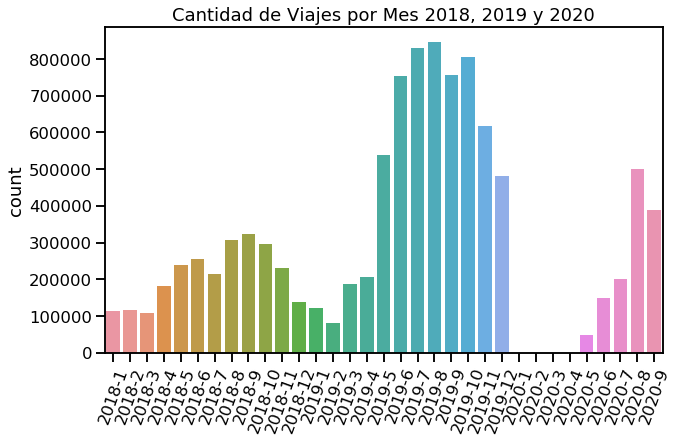

In [95]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(recorridos.aniomes.values,order=['2018-1','2018-2','2018-3','2018-4','2018-5','2018-6','2018-7','2018-8','2018-9','2018-10','2018-11','2018-12','2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12','2020-1','2020-2','2020-3','2020-4','2020-5','2020-6','2020-7','2020-8','2020-9'])
plt.title("Cantidad de Viajes por Mes 2018, 2019 y 2020")
plt.xticks(rotation=70)
plt.show()

Efectivamente y como las dimensiones de las tablas nos adelantaron, en 2019 hubo muchísimos más viajes que en 2018. 
Durante los primeros meses de 2020 no hubo viajes dado que las estaciones estuvieron cerradas, pero vemos como poco a poco a partir de mayo de 2020 se han comenzado a registrar viajes. 
Además, podemos notar que los meses de enero, febrero y marzo suelen tener menos viajes que los de invierno. 


Vamos a ver ahora las estaciones con más viajes:

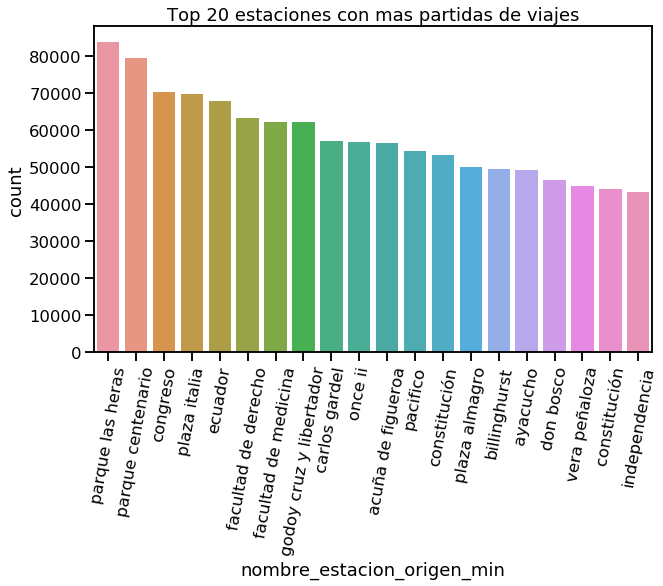

In [96]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(x="nombre_estacion_origen_min",data=recorridos, 
            order=recorridos.nombre_estacion_origen_min.value_counts().iloc[:20].index)
plt.title("Top 20 estaciones con mas partidas de viajes")
plt.xticks(rotation=80)
plt.show()

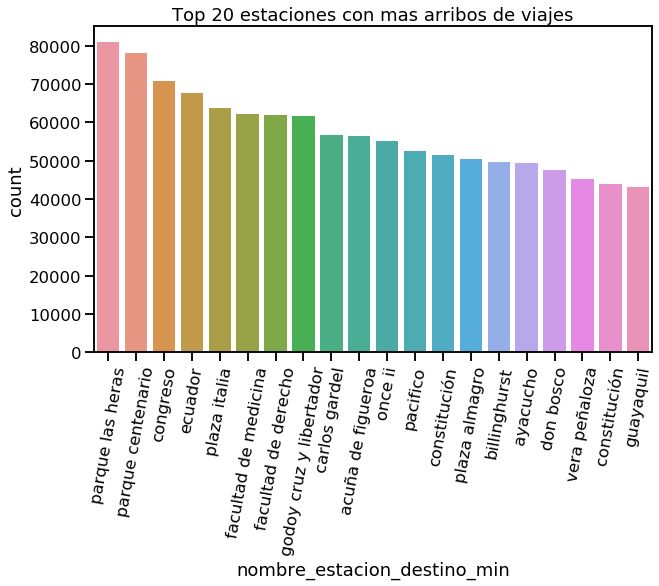

In [97]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(10,6))
sns.countplot(x="nombre_estacion_destino_min",data=recorridos, 
            order=recorridos.nombre_estacion_destino_min.value_counts().iloc[:20].index)
plt.title("Top 20 estaciones con mas arribos de viajes")
plt.xticks(rotation=80)
plt.show()

Y ¿cómo varía la duración de los viajes? Vamos a verlo en un gráfico:

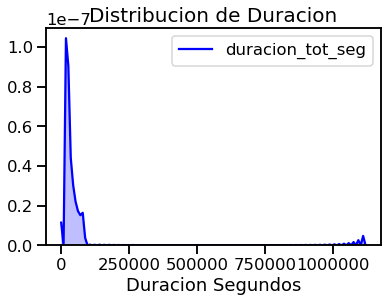

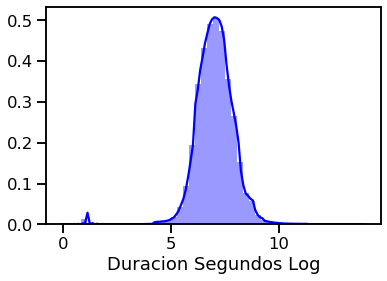

In [98]:
#Creamos columna nueva con el logaritmo de la duración
recorridos['log_duracion'] = np.log(1+recorridos['duracion_tot_seg'])

#Plot Duracion en escala lineal
sns.kdeplot(recorridos.duracion_tot_seg, color="b", shade = True)
plt.xlabel("Duracion Segundos")
plt.title('Distribucion de Duracion',size = 20)
plt.show()

#Plot Log-Duracion en escala logarítimica, acá obtenemos mejores resultados con todo lo que sea machine learning 
sns.distplot(recorridos['log_duracion'],color='b')
plt.xlabel("Duracion Segundos Log")
plt.show()

¿Hay alguna diferencia entre las duraciones de los viajes según la estacion de partida? Vamos a verlo en un boxplot:

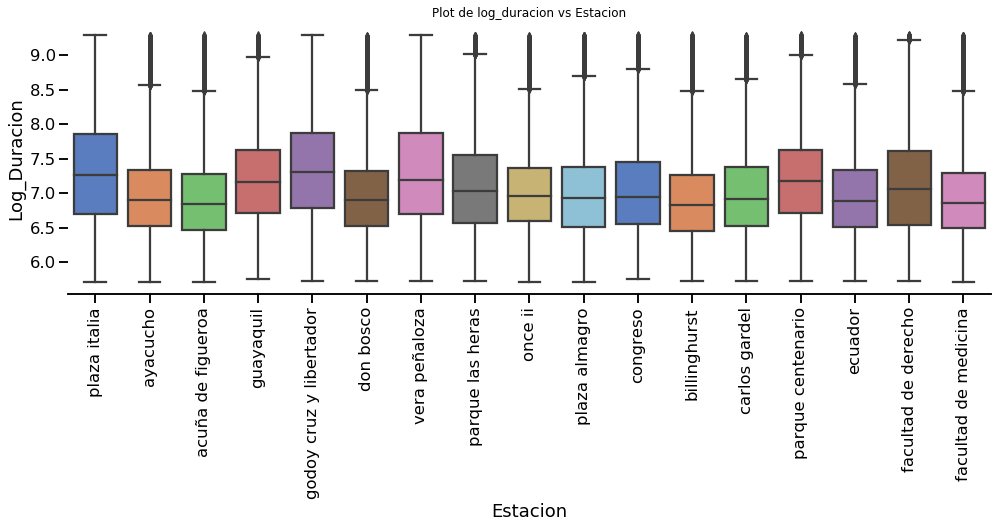

In [99]:
#Vamos a comparar las duraciones de los viajes de nuestro top 20 de estaciones origen con mas viajes, pero vamos a filtrar 2018
# filtramos recorridos por las estaciones con mas viajes
recorridostop20origen= recorridos.loc[(recorridos['nombre_estacion_origen_min']== 'parque las heras') | (recorridos['nombre_estacion_origen_min']== 'parque centenario')| (recorridos['nombre_estacion_origen_min']== 'facultad de derecho')| (recorridos['nombre_estacion_origen_min']== 'constitucion')| (recorridos['nombre_estacion_origen_min']== 'once ii')| (recorridos['nombre_estacion_origen_min']== 'plaza almagro')| (recorridos['nombre_estacion_origen_min']== 'billinghurtst')| (recorridos['nombre_estacion_origen_min']== 'congreso')| (recorridos['nombre_estacion_origen_min']== 'plaza italia')| (recorridos['nombre_estacion_origen_min']== 'ecuador')| (recorridos['nombre_estacion_origen_min']== 'facultad de medicina')| (recorridos['nombre_estacion_origen_min']== 'godoy cruz y libertador')| (recorridos['nombre_estacion_origen_min']== 'carlos gardel')| (recorridos['nombre_estacion_origen_min']== 'acuña de figueroa')| (recorridos['nombre_estacion_origen_min']== 'pacifico')| (recorridos['nombre_estacion_origen_min']== 'constitución')| (recorridos['nombre_estacion_origen_min']== 'plaza almagro')| (recorridos['nombre_estacion_origen_min']== 'billinghurst')| (recorridos['nombre_estacion_origen_min']== 'ayacucho')| (recorridos['nombre_estacion_origen_min']== 'don bosco')| (recorridos['nombre_estacion_origen_min']== 'vera peñaloza')| (recorridos['nombre_estacion_origen_min']== 'guayaquil')]
recorridos2018top20plot= recorridostop20origen.loc[(recorridos['anio']==2018)]
#Hacemos el grafico
g = sns.catplot(x='nombre_estacion_origen_min',y='log_duracion',data=recorridos2018top20plot, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("Estacion")
plt.ylabel("Log_Duracion")
plt.title('Plot de log_duracion vs Estacion',size = 12)
plt.show()

Pareceria ser que las medianas de Plaza Italia y Godoy cruz y Libertador son las más altas. A su vez, estas presentan mayor variabilidad en la duración del viaje versus otras estaciones como Once II o Facultad de Derecho, con menor amplitud de caja. 

Y, ¿Cómo impacta la franja horaria en la que se produzca la salida?

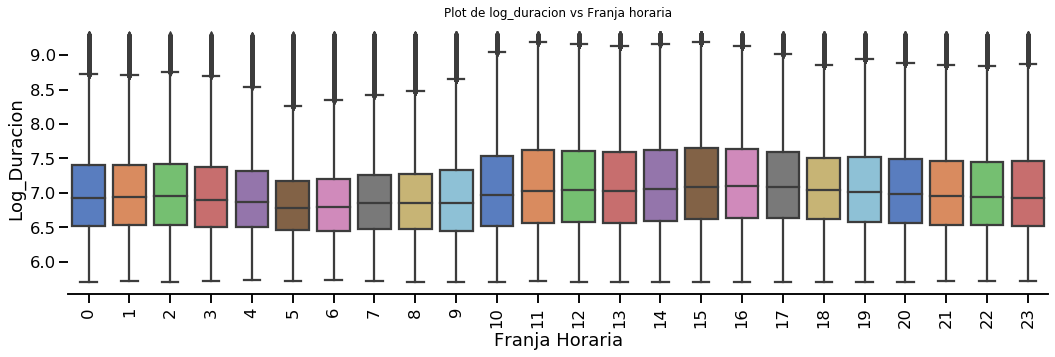

In [100]:
recorridos2018plot= recorridos.loc[(recorridos['anio']==2018)]
g = sns.catplot(x='franja_horaria',y='log_duracion',data=recorridos2018plot, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("Franja Horaria")
plt.ylabel("Log_Duracion")
plt.title('Plot de log_duracion vs Franja horaria',size = 12)
plt.show()

Los viajes que se producen a la madrugada son más cortos! Los viajes más largos se dan a partir de las 11 am. 

Y, ¿si analizamos la duración a través de los días de la semana?

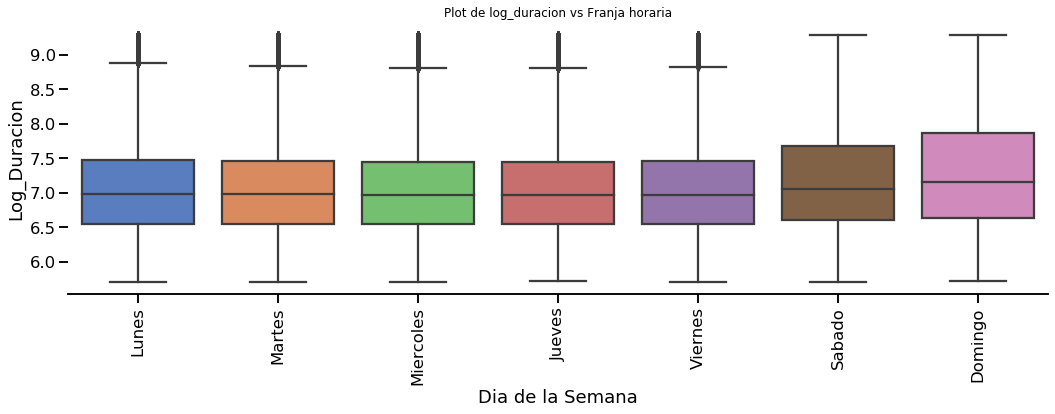

In [101]:
g = sns.catplot(x='DiaSem',y='log_duracion',data=recorridos2018plot, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("Dia de la Semana")
plt.ylabel("Log_Duracion")
plt.title('Plot de log_duracion vs Franja horaria',size = 12)
plt.show()

Los viajes de fin de semana son más largos que los de los días de la semana! En particular los viajes de los domingos son los más largos, y donde hay mayor variabilidad. De lunes a viernes se mantienen constantes y se comportan similar.

Por último, vamos a visualizar el comportamiento de la duración para todas las estaciones de partida, en el plot anterior solo habíamos visto el top 20: 

In [102]:
recorridosmapaduracion=recorridos2018plot.loc[:, ['lat_origen', 'long_origen', 'log_duracion', 'anio']]

In [103]:
#eliminamos nulos
recorridosmapaduracion=recorridosmapaduracion.dropna()

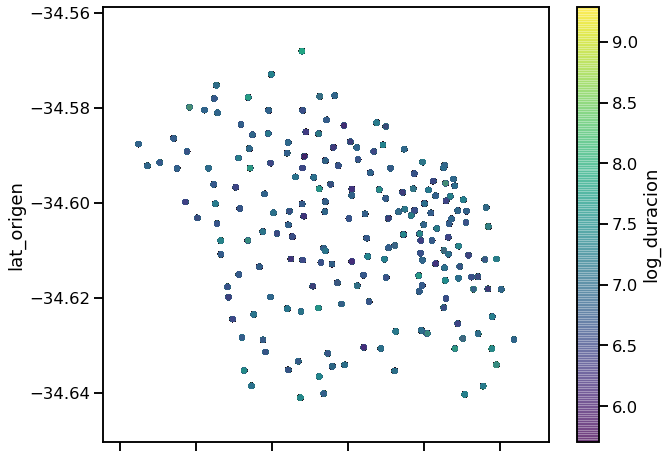

In [104]:
recorridosmapaduracion.plot(kind='scatter', x='long_origen', y='lat_origen', c='log_duracion',
        cmap=plt.get_cmap(), alpha=0.5, figsize=(10,8))
plt.show()

Podemos concluir que la duración también va variando según la estacion. 

# Predicción de la Duración de un Viaje

Vimos que varias de las features se relacionan con la duración de un viaje, ¡y hay tantas otras que no analizamos todavía! ¿Importa el género de la persona o su edad? ¿Importa también la estación de destino? Vamos a utilizar un modelo de regresión para tratar de predecir la duración de un viaje utilizando todas estas features de entrada. 

Dado que solo disponemos de tablas con información de los usuarios del sistema de Ecobicis hasta 2018, utilizaremos sólo los recorridos de este año para armar el modelo. 

In [105]:
# Vamos a importar tablas con informacion de los usuarios para traernos sexo y edad, las tablas también son datos públicos de la web de CABA Data. 
#Hay tablas de usuarios de 2015,2016,2017 y 2018. 
usuarios2015 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2015.csv', delimiter=',',low_memory=False)
usuarios2016 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2016.csv', delimiter=',',low_memory=False)
usuarios2017 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2017.csv', delimiter=',',low_memory=False)
usuarios2018 = pd.read_csv(r'C:\\Users\\limat\\Desktop\\Operativa\\CIENCIA DE DATOS\\TP\\usuarios-ecobici-2018.csv', delimiter=',',low_memory=False)
#usuarios2015 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2015.csv', delimiter=',',low_memory=False)
#usuarios2016 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2016.csv', delimiter=',',low_memory=False)
#usuarios2017 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2017.csv', delimiter=',',low_memory=False)
#usuarios2018 = pd.read_csv(r'C:\Users\Milagros\OneDrive\Escritorio\UTN\5To AÑO\Ciencia de datos\tp2\usuarios-ecobici-2018.csv', delimiter=',',low_memory=False)

In [106]:
usuarios2015.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,7682,M,45,2015-02-28,17:32:55.087
1,19577,M,47,2015-02-28,17:33:12.227
2,108635,M,26,2015-02-28,17:35:13.800
3,129948,M,29,2015-02-28,17:35:42.780
4,129949,M,24,2015-02-28,17:35:42.780


In [107]:
usuarios2016.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,223858,M,41,2016-01-01,03:45:19.040
1,223873,M,35,2016-01-01,12:36:42.073
2,223874,M,47,2016-01-01,12:45:43.570
3,223875,F,42,2016-01-01,12:54:43.570
4,223876,M,49,2016-01-01,12:58:38.463


In [108]:
usuarios2017.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,336112,M,21,2017-01-01,01:32:10.863
1,336114,M,26,2017-01-01,01:42:05.780
2,336119,F,40,2017-01-01,03:06:03.890
3,336120,F,43,2017-01-01,07:15:26.287
4,336141,F,58,2017-01-01,11:53:37.247


In [109]:
usuarios2018.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,380973,F,49,03/10/2018,5:57:40
1,381008,M,26,02/01/2018,5:53:06
2,624273,M,22,28/09/2018,5:57:35
3,624274,F,24,28/09/2018,5:57:35
4,624275,M,30,05/10/2018,5:57:42


In [110]:
#Hacemos una unica tabla
usuarios1718=usuarios2017.append(usuarios2018, ignore_index=True)
usuarios1516=usuarios2015.append(usuarios2016, ignore_index=True)
usuarios=usuarios1718.append(usuarios1516, ignore_index=True)
usuarios

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,336112,M,21,2017-01-01,01:32:10.863
1,336114,M,26,2017-01-01,01:42:05.780
2,336119,F,40,2017-01-01,03:06:03.890
3,336120,F,43,2017-01-01,07:15:26.287
4,336141,F,58,2017-01-01,11:53:37.247
...,...,...,...,...,...
194277,336095,M,28,2016-12-31,20:36:57.560
194278,336102,M,23,2016-12-31,21:29:28.100
194279,336104,M,23,2016-12-31,22:11:50.170
194280,336107,F,24,2016-12-31,22:57:19.137


In [111]:
#Se concatenaron bien!
40397+39481+58222+56182

194282

In [112]:
#Uno el dataet de recorridos 2018 con el dataset de usuarios
recorridos_usuarios = recorridos2018_total.merge(usuarios, how= 'left' , left_on = ['id_usuario'], right_on=['usuario_id'])
recorridos_usuarios.shape

(2520629, 29)

In [113]:
recorridos_usuarios.head()

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,fecha_destino_recorrido,id_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,...,dia,franja_horaria,aniomes,nombre_estacion_origen_min,nombre_estacion_destino_min,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,1193,45,2018-01-01 00:08:05,2018-01-01 00:27:58,183,5453,San nicolas,20,-34.601864,-58.386693,...,1,0,2018-1,uruguay,virrey cevallos,NaN,NaN,NaN,NaN,NaN
1,1579,189,2018-01-01 00:18:05,2018-01-01 00:44:24,110,673,Retiro,20,-34.588689,-58.385211,...,1,0,2018-1,posadas,guardia vieja,NaN,NaN,NaN,NaN,NaN
2,1659,50,2018-01-01 00:20:14,2018-01-01 00:47:53,31,179119,Palermo,20,-34.583735,-58.401080,...,1,0,2018-1,hospital rivadavia,padilla,179119.0,F,51.0,2015-06-30,13:00:10.340
3,2931,111,2018-01-01 00:20:22,2018-01-01 01:09:13,54,400147,Puerto madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,acuña de figueroa,400147.0,M,27.0,2017-05-23,13:39:10.897
4,2967,111,2018-01-01 00:20:31,2018-01-01 01:09:58,54,400156,Puerto madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,acuña de figueroa,400156.0,F,27.0,2017-05-23,13:53:10.617


In [114]:
#Vamos a ver si hay nulos
nulosrecorridosporusuario2018 = (recorridos_usuarios.isnull().sum()/recorridos_usuarios.isnull().count()).sort_values(ascending=False)

In [115]:
nulosrecorridosporusuario2018

usuario_sexo                   0.253518
hora_alta                      0.253474
usuario_edad                   0.253474
usuario_id                     0.253474
fecha_alta                     0.253474
capacidad_destino              0.000000
id_estacion_origen             0.000000
fecha_origen_recorrido         0.000000
fecha_destino_recorrido        0.000000
id_estacion_destino            0.000000
id_usuario                     0.000000
barrio_origen                  0.000000
capacidad_origen               0.000000
lat_origen                     0.000000
long_origen                    0.000000
barrio_destino                 0.000000
Fecha_str                      0.000000
lat_destino                    0.000000
long_destino                   0.000000
DiaSem                         0.000000
DiaLab                         0.000000
anio                           0.000000
mes                            0.000000
dia                            0.000000
franja_horaria                 0.000000


In [116]:
#eliminamos nulos
recorridos_usuarios=recorridos_usuarios.dropna()
recorridos_usuarios

,duracion_tot_seg,id_estacion_origen,fecha_origen_recorrido,fecha_destino_recorrido,id_estacion_destino,id_usuario,barrio_origen,capacidad_origen,lat_origen,long_origen,...,dia,franja_horaria,aniomes,nombre_estacion_origen_min,nombre_estacion_destino_min,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
2,1659,50,2018-01-01 00:20:14,2018-01-01 00:47:53,31,179119,Palermo,20,-34.583735,-58.401080,...,1,0,2018-1,hospital rivadavia,padilla,179119.0,F,51.0,2015-06-30,13:00:10.340
3,2931,111,2018-01-01 00:20:22,2018-01-01 01:09:13,54,400147,Puerto madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,acuña de figueroa,400147.0,M,27.0,2017-05-23,13:39:10.897
4,2967,111,2018-01-01 00:20:31,2018-01-01 01:09:58,54,400156,Puerto madero,0,-34.604969,-58.363000,...,1,0,2018-1,macacha güemes,acuña de figueroa,400156.0,F,27.0,2017-05-23,13:53:10.617
5,2170,121,2018-01-01 00:21:01,2018-01-01 00:57:11,143,476733,Almagro,20,-34.601173,-58.428509,...,1,0,2018-1,yatay,billinghurst y valentín gomez,476733.0,F,30.0,2017-11-14,23:06:18.893
6,2131,121,2018-01-01 00:21:30,2018-01-01 00:57:01,143,326932,Almagro,20,-34.601173,-58.428509,...,1,0,2018-1,yatay,billinghurst y valentín gomez,326932.0,F,27.0,2016-12-02,13:50:28.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520623,654,156,2018-12-30 19:45:39,2018-12-30 19:56:33,5,501464,Palermo,20,-34.577590,-58.407470,...,30,19,2018-12,plaza alemania,plaza italia,501464.0,M,22.0,17/01/2018,5:53:21
2520624,435,75,2018-12-30 19:46:32,2018-12-30 19:53:47,118,190597,Balvanera,20,-34.612298,-58.398987,...,30,19,2018-12,plaza primero de mayo,méxico,190597.0,M,21.0,13/12/2018,5:58:51
2520626,632,30,2018-12-30 19:48:51,2018-12-30 19:59:23,76,652034,Recoleta,20,-34.590821,-58.397370,...,30,19,2018-12,peña,ayacucho,652034.0,F,20.0,16/11/2018,5:58:24
2520627,597,52,2018-12-30 19:51:42,2018-12-30 20:01:39,52,467438,Almagro,0,-34.607089,-58.414668,...,30,19,2018-12,sánchez de bustamante,sánchez de bustamante,467438.0,M,26.0,18/04/2018,5:54:52


In [117]:
#Me quedo solo con el mes de agosto
recorridos_usuarios= recorridos_usuarios[(recorridos_usuarios['mes']==8)]

In [118]:
#Hacemos dummies de sexo
dummies_sexo  = pd.get_dummies(recorridos_usuarios.usuario_sexo)
dummies_sexo.shape

(230805, 2)

In [119]:
#Concatenamos las dummies de sexo con el dataset
recorridos_dumm= pd.concat([recorridos_usuarios,dummies_sexo],axis = 1)
recorridos_dumm.shape

(230805, 31)

In [120]:
#Hacemos dummies de franja horaria
dummies_franja  = pd.get_dummies(recorridos_usuarios.franja_horaria)
dummies_franja.shape

(230805, 24)

In [121]:
#Concatenamos las dummies de franja horaria con el dataset
recorridos_dumm= pd.concat([recorridos_dumm,dummies_franja],axis = 1)
recorridos_dumm.shape

(230805, 55)

In [122]:
recorridos_droppeado = recorridos_dumm.drop(columns=['id_estacion_origen', 'fecha_origen_recorrido',
       'fecha_destino_recorrido', 'id_estacion_destino', 'id_usuario', 'capacidad_origen', 'barrio_origen', 'barrio_destino','capacidad_destino',
       'Fecha_str', 'DiaSem', 'anio', 'mes', 'dia', 'franja_horaria',
       'aniomes', 'nombre_estacion_origen_min', 'nombre_estacion_destino_min',
       'usuario_id','usuario_sexo', 'fecha_alta', 'hora_alta',
       ])

In [123]:
recorridos_droppeado.columns

Index(['duracion_tot_seg',       'lat_origen',      'long_origen',
            'lat_destino',     'long_destino',           'DiaLab',
           'usuario_edad',                'F',                'M',
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23],
      dtype='object')

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


 mu = 1551.77 and sigma = 1372.65



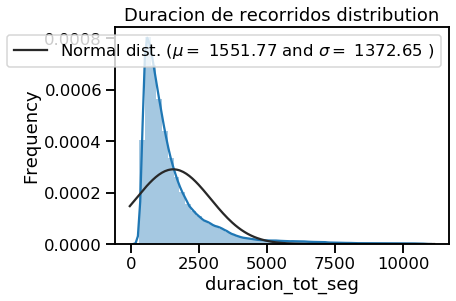

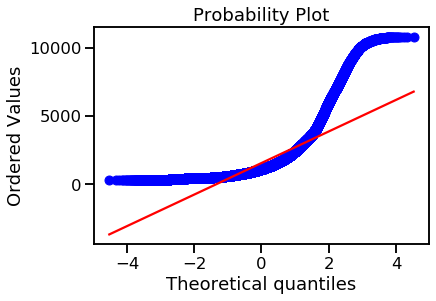

In [125]:
#Duracion de recorridos es la variable a predecir entonces vamos a graficar la distribucion de la misma 
#La distribucion de la misma a priori no es una normal
sns.distplot(recorridos_droppeado['duracion_tot_seg'] , fit=norm);
#Vamos a  ajustar la distribucion original que tienen los datos a una distribucion normal 
(mu, sigma) = norm.fit(recorridos_droppeado['duracion_tot_seg'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Vamos a plotear la distribution original y la normal 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Duracion de recorridos distribution')

# QQ-plot
#Con este grafico lo que se puede ver es que tan bien o que tan mal se ajusta la distribucion original de tus datos 
#a la otra distribucion que estas probando, que en este caso es normal 
fig = plt.figure()
res = stats.probplot(recorridos_droppeado['duracion_tot_seg'], plot=plt)
plt.show()

In [126]:
##Nos dimos cuenta que de esta manera no se ajusta bien a una normal , por lo que vamos a pasar la columna de duracion de 
#recorrido a una escala logaritmica

##Luego vamos a volver a pasarla a fittearla a distribucion normal y plottear


 mu = 7.09 and sigma = 0.67



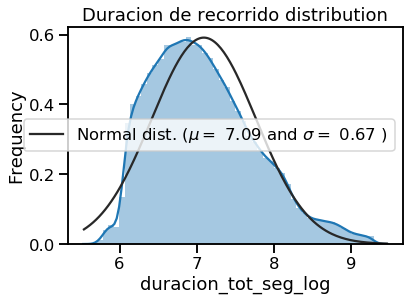

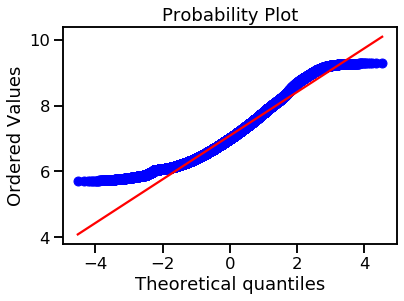

In [127]:
#Pasamos a logaritmica la columan de duracion de recorrido
recorridos_droppeado["duracion_tot_seg_log"] = np.log1p(recorridos_droppeado["duracion_tot_seg"])

#Fiteamos a normal
sns.distplot(recorridos_droppeado['duracion_tot_seg_log'] , fit=norm);

#Obtenemos los parametros de la normal(mu, sigma)
(mu, sigma) = norm.fit(recorridos_droppeado['duracion_tot_seg_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Ploteamos la distribucion
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Duracion de recorrido distribution')

#QQ-plot para analizar que tan bien o que tan mal se adapta la "duracion de recorridos" 
#a una distribucion normal 
fig = plt.figure()
res = stats.probplot(recorridos_droppeado['duracion_tot_seg_log'], plot=plt)
plt.show()

In [128]:
#vamos a ver cuales son los outliers para droppearlos

In [129]:
#Vemos la cantidad de recorridos con duracin menor a 5 min
recorridos_loc_izquierda = recorridos_droppeado[recorridos_droppeado['duracion_tot_seg'] <= 300]

In [130]:
recorridos_loc_izquierda.shape

(0, 34)

In [131]:
#Como son muy poco recorridos, los dejamos


In [132]:
recorridos_droppeado['duracion_tot_seg'].dtype

dtype('int64')

In [133]:
#Ahora vemos los outliers a la derecha de la curva, es decir, los recorridos con duracion 
#mayor a dos horas y media ya dos horas es el limite de utilizacion de ecobici actual

In [134]:
recorridos_loc_derecha = recorridos_droppeado[recorridos_droppeado['duracion_tot_seg'] >= 9000]
recorridos_loc_derecha.shape

(968, 34)

In [135]:
#Dropeamos estas samples

In [136]:
recorridos_final = recorridos_droppeado.drop(recorridos_droppeado[(recorridos_droppeado['duracion_tot_seg'] >= 9000)].index)

In [137]:
recorridos_final.shape

(229837, 34)

In [138]:
recorridos_final = recorridos_droppeado.drop(columns=['duracion_tot_seg',])

Armado de modelo de regresión


In [139]:
#Chequeamos tener la duracion de recorridos al final del dataset, ya que es nuestra "etiqueta" a predecir

In [140]:
recorridos_final.columns

Index([          'lat_origen',          'long_origen',          'lat_destino',
               'long_destino',               'DiaLab',         'usuario_edad',
                          'F',                    'M',                      0,
                            1,                      2,                      3,
                            4,                      5,                      6,
                            7,                      8,                      9,
                           10,                     11,                     12,
                           13,                     14,                     15,
                           16,                     17,                     18,
                           19,                     20,                     21,
                           22,                     23, 'duracion_tot_seg_log'],
      dtype='object')

In [141]:
recorridos_final = recorridos_final[['lat_origen', 'long_origen', 'lat_destino','long_destino', 'usuario_edad','DiaLab', 'F', 'M',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
       'duracion_tot_seg_log']]

In [142]:
recorridos_final.columns

Index([          'lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad',               'DiaLab',
                          'F',                    'M',                      0,
                            1,                      2,                      3,
                            4,                      5,                      6,
                            7,                      8,                      9,
                           10,                     11,                     12,
                           13,                     14,                     15,
                           16,                     17,                     18,
                           19,                     20,                     21,
                           22,                     23, 'duracion_tot_seg_log'],
      dtype='object')

In [143]:
##Importamos librerias para los modelos 

#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [144]:
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [145]:
#Declaramos las variables x: todas las features que le mandamos al modelo 
#y: la variable a predecir, que es la duracion del recorrido (ultima columna del dataset)
x = recorridos_final.iloc[:,:-1].values
y = recorridos_final.iloc[:,-1].values
print(x.shape,y.shape)

(230805, 32) (230805,)


In [146]:
# Separamos set de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.95, random_state=1)
# Separamos el set X con las features polinomicas (el set Y ya fue separado en la linea anterior) 
x_poly_train, x_poly_test = train_test_split(x, test_size=0.95, random_state=1)

In [147]:
#Pasamos a dataframe
x_poly_train= pd.DataFrame(x_poly_train)
x_poly_test = pd.DataFrame(x_poly_test)

In [148]:
#Separamos el x_train y el x_test, en la parte de dummies y en la parte de features continuas
# para luego solo escalar las continuas
x_poly_train_dummies =x_poly_train.iloc[:,-27:]
x_poly_test_dummies =x_poly_test.iloc[:,-27:]

x_dummies_train= pd.DataFrame(x_poly_train_dummies)
x_dummies_test= pd.DataFrame(x_poly_test_dummies)

In [149]:
#Pasamos a dataframe
x_train= pd.DataFrame(x_train, columns=[          'lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad',               'DiaLab',
                          'F',                    'M',                  
                            0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,                     10,                     11,
                           12,                     13,                     14,
                           15,                     16,                     17,
                           18,                     19,                     20,
                           21,                     22,                     23])
x_test= pd.DataFrame(x_test, columns=[          'lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad',               'DiaLab',
                          'F',                    'M',                  
                            0,                      1,                      2,
                            3,                      4,                      5,
                            6,                      7,                      8,
                            9,                     10,                     11,
                           12,                     13,                     14,
                           15,                     16,                     17,
                           18,                     19,                     20,
                           21,                     22,                     23])

In [150]:
# Definimos el escalador 
scaler = MinMaxScaler()
# Fiteamos para los x_train
scaler = scaler.fit(x_train.iloc[:, :-27])

In [151]:
#Transformamos a x_train y x_test con el escalador ya fitteado por el train (solo features continuas)
x_train_scaled =scaler.transform(x_train.iloc[:, :-27])
x_test_scaled = scaler.transform(x_test.iloc[:, :-27])

In [152]:
#Pasamos a dataframe
x_train_scaled= pd.DataFrame(x_train_scaled, columns=['lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad'])
x_test_scaled= pd.DataFrame(x_test_scaled, columns=['lat_origen',          'long_origen',          'lat_destino',
               'long_destino',         'usuario_edad'])

In [153]:
x_test_scaled.head()

,lat_origen,long_origen,lat_destino,long_destino,usuario_edad
0,0.248484,0.432661,0.498389,0.398701,0.397059
1,0.592183,0.703322,0.662618,0.436612,0.411765
2,0.828835,0.346197,0.286206,0.818922,0.558824
3,0.258615,0.478705,0.501643,0.827055,0.294118
4,0.430736,0.492966,0.346592,0.659284,0.102941


In [154]:
x_train_scaled_2= pd.concat([x_train_scaled,x_dummies_train],axis = 1)

x_test_scaled_2= pd.concat([x_test_scaled,x_dummies_test],axis = 1)

In [155]:
#Luego de escalar los datos agrego las features polinomicas
grad_poly = 5
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_train.iloc[:, :-27])
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_test.iloc[:, :-27])

In [156]:
#Paso a dataframe
x_train_poly_scaled= pd.DataFrame(x_train_poly_scaled)
x_test_poly_scaled= pd.DataFrame(x_test_poly_scaled)

In [157]:
x_poly_train_scaled_2= pd.concat([x_train_poly_scaled,x_dummies_train],axis = 1)

x_poly_test_scaled_2= pd.concat([x_test_poly_scaled,x_dummies_test],axis = 1)


In [158]:
x_test_scaled_2.head()

,lat_origen,long_origen,lat_destino,long_destino,usuario_edad,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0.248484,0.432661,0.498389,0.398701,0.397059,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592183,0.703322,0.662618,0.436612,0.411765,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.828835,0.346197,0.286206,0.818922,0.558824,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.258615,0.478705,0.501643,0.827055,0.294118,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.430736,0.492966,0.346592,0.659284,0.102941,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
#creamos vector de resultados
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])

In [160]:
#Definimos el estimador
est = LinearRegression()

In [161]:
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 5
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [162]:
#Comenzamos el grid search
gs.fit(x_train_scaled_2, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [False, True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [163]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'fit_intercept': True} 

-0.4421041845183204 



In [164]:
# Usamos x_test para predecir con el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled_2)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

R2 score: 0.042368
MAE: 0.435771
MSE: 0.534492


<function print>

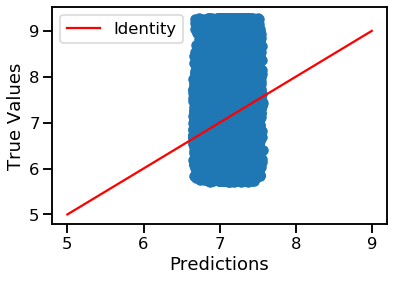

In [165]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(5,10),np.arange(5,10), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {linear_r2:.6f}')
print(f'MAE: {linear_mse:.6f}')
print(f'MSE: {linear_mae:.6f}')
print 

In [166]:
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])

In [167]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear',
                                'Features':'Lineal',
                                'R2':linear_r2,
                                'MSE':linear_mse,
                                'MAE':linear_mae},ignore_index=True)

In [168]:
#Motramos los resultados del modelo lineal para features lineales
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492


Ahora probamos modelo lineal para features polinomicas

In [169]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_poly_train_scaled_2, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

{'fit_intercept': True} 

-0.38972868927536014 



In [170]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_poly_test_scaled_2)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

R2 score: 0.164718
MAE: 0.380096
MSE: 0.471731


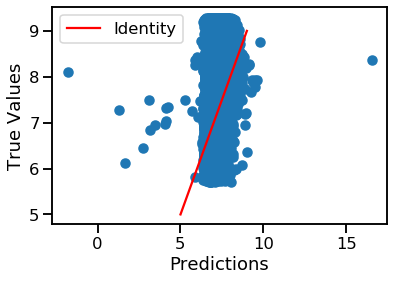

In [171]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(5,10),np.arange(5,10), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [172]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly grado 5',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

In [173]:
#Mostramos resultados de modelo lineal con lineales y con polinomicas. La tabla dice grado 4 pero fue grado 5!
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 4,0.164718,0.380096,0.471731


In [204]:
#Vamos a probar con grado 4
grad_poly = 4
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_train.iloc[:, :-27])
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_poly_test.iloc[:, :-27])

In [205]:
#Paso a dataframe
x_train_poly_scaled= pd.DataFrame(x_train_poly_scaled)
x_test_poly_scaled= pd.DataFrame(x_test_poly_scaled)

In [206]:
x_poly_train_scaled_2= pd.concat([x_train_poly_scaled,x_dummies_train],axis = 1)

x_poly_test_scaled_2= pd.concat([x_test_poly_scaled,x_dummies_test],axis = 1)

In [ ]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_poly_train_scaled_2, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

In [ ]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_poly_test_scaled_2)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)

In [ ]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(5,10),np.arange(5,10), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mse:.6f}')
print(f'MSE: {poly_linear_mae:.6f}')

In [ ]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly grado 4',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)

In [ ]:
results_df

Ahora armamos el modelo Ridge regresion con features lineales

In [174]:
# Ahora cambiamos el estimador, usaremos Ridge Regression
est = Ridge()
# Lista del parametro lambda (llamado 'alpha' en el GridSearch )
lambdas = [100,200,300,400,500]
# Juntamos el diccionario de parametros
parameters = {'alpha': lambdas}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs_1 = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")

In [175]:
# Entrenamos
gs_1.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [100, 200, 300, 400, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [176]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs_1.best_estimator_, "\n")
print(gs_1.best_params_, "\n")
print(gs_1.best_score_, "\n")

Ridge(alpha=400, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 400} 

-0.45800654537961716 



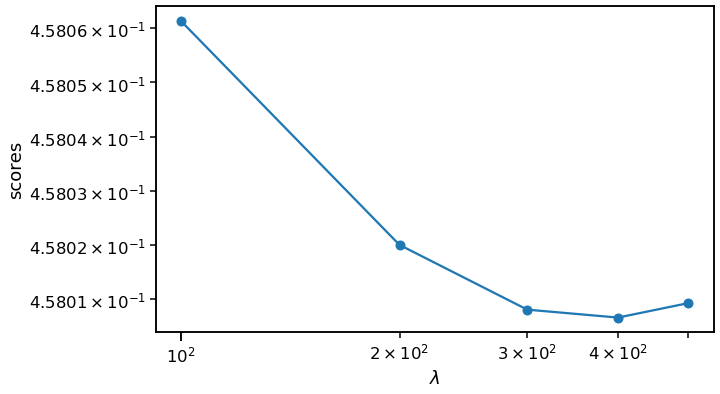

In [177]:
# Vamos a plotear nuestro parametro lambda vs. el score
fit_lambdas = [d['alpha'] for d in gs_1.cv_results_['params']]
fit_scores = gs_1.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [178]:
#Predicciones + Metricas
ridge_prediction = gs_1.best_estimator_.predict(x_test_scaled)
ridge_r2 = r2_score(y_true=y_test, y_pred=ridge_prediction)
ridge_mse = mean_squared_error(y_true=y_test, y_pred=ridge_prediction)
ridge_mae = mean_absolute_error(y_true=y_test, y_pred=ridge_prediction)

R2 score: 0.001011
MAE: 0.454591
MSE: 0.544708


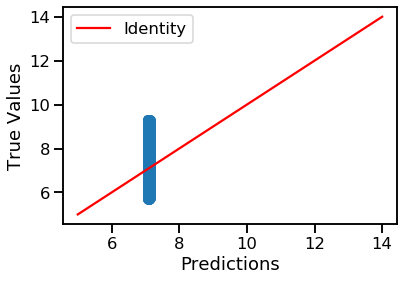

In [179]:
# Plots
plt.scatter(ridge_prediction, y_test)
plt.plot(np.arange(5,15),np.arange(5,15), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {ridge_r2:.6f}')
print(f'MAE: {ridge_mse:.6f}')
print(f'MSE: {ridge_mae:.6f}')

In [180]:
#Guardamos resultados
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Lineal',
                                'R2':ridge_r2,
                                'MSE':ridge_mse,
                                'MAE':ridge_mae},ignore_index=True)

In [181]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 4,0.164718,0.380096,0.471731
2,Ridge,Lineal,0.001011,0.454591,0.544708


In [182]:
#Definimos estimador
est = Ridge()

gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
gs.fit(x_train_poly_scaled, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 100} 

-0.40559461621462145 



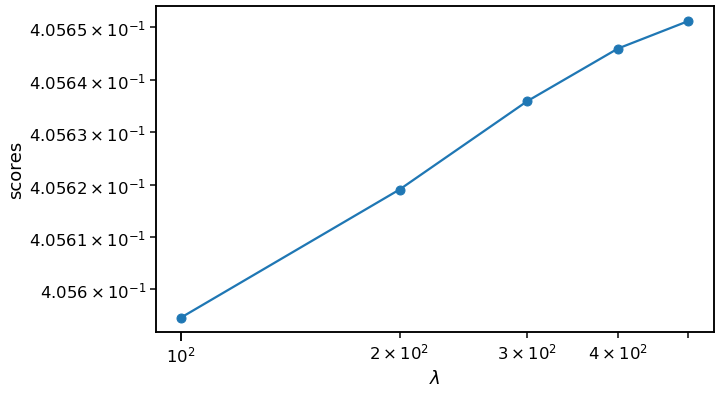

In [183]:
# Vamos a plotear nuestro parametro lambda vs el score
fit_lambdas = [d['alpha'] for d in gs.cv_results_['params']]
fit_scores = gs.cv_results_['mean_test_score']
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [184]:
# Prediccion + Metricas
poly_ridge_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
poly_ridge_r2 = r2_score(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mse = mean_squared_error(y_true=y_test, y_pred=poly_ridge_prediction)
poly_ridge_mae = mean_absolute_error(y_true=y_test, y_pred=poly_ridge_prediction)

R2 score: 0.112025
MAE: 0.404074
MSE: 0.488170


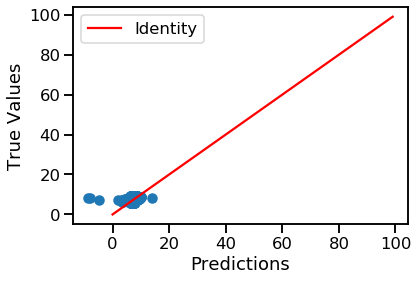

In [185]:
# Plots
plt.scatter(poly_ridge_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_ridge_r2:.6f}')
print(f'MAE: {poly_ridge_mse:.6f}')
print(f'MSE: {poly_ridge_mae:.6f}')

In [186]:
# Guardamos
results_df = results_df.append({'Model':'Ridge',
                                'Features':'Poly',
                                'R2':poly_ridge_r2,
                                'MSE':poly_ridge_mse,
                                'MAE':poly_ridge_mae},ignore_index=True)

In [187]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 4,0.164718,0.380096,0.471731
2,Ridge,Lineal,0.001011,0.454591,0.544708
3,Ridge,Poly,0.112025,0.404074,0.488170


In [188]:
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [189]:
# Entrenamos
gs.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  9.3min
[Parallel(n_jobs=3)]: Done 407 tasks      | elapsed: 23.7min
[Parallel(n_jobs=3)]: Done 756 tasks      | elapsed: 42.5min
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed: 47.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [1000, 1500, 2000, 3000, 5000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [190]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 1000, 'epsilon': 0.1, 'gamma': 0.01} 

-0.42344032107687984 



In [191]:
# Prediccion + Metricas
svr_prediction = gs.best_estimator_.predict(x_test_scaled)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr_prediction)

R2 score: 0.087013
MAE: 0.415455
MSE: 0.473109


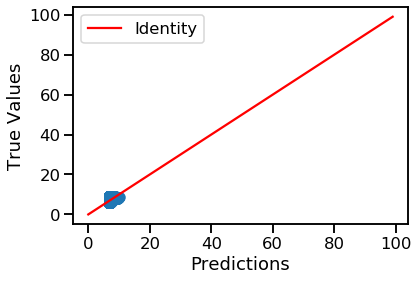

In [192]:
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MAE: {svr_mse:.6f}')
print(f'MSE: {svr_mae:.6f}')

In [193]:
results_df = results_df.append({'Model':'SVR',
                                'Features':'Linear',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

In [194]:
results_df 

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042368,0.435771,0.534492
1,Linear,Poly grado 4,0.164718,0.380096,0.471731
2,Ridge,Lineal,0.001011,0.454591,0.544708
3,Ridge,Poly,0.112025,0.404074,0.488170
4,SVR,Linear,0.087013,0.415455,0.473109


In [195]:
#Vamos con poly svr
grad_poly = 4
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

In [196]:
x_test_poly_scaled.shape

(219265, 126)

In [197]:
est = SVR(kernel='rbf',max_iter=25000)
parameters = {'C' : [500,1000,1500,2000],
              'epsilon' : [0.001, 0.01,1,100],
             'gamma':[0.01,0.1, 10,100]}

gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error",
                  n_jobs=5,verbose=3,refit=True)
gs.fit(x_train_poly_scaled, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  3.0min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed: 11.4min
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed: 22.8min
[Parallel(n_jobs=5)]: Done 320 out of 320 | elapsed: 23.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=25000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=5,
             param_grid={'C': [500, 1000, 1500, 2000],
                         'epsilon': [0.001, 0.01, 1, 100],
                         'gamma': [0.01, 0.1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [198]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
    kernel='rbf', max_iter=25000, shrinking=True, tol=0.001, verbose=False) 

{'C': 500, 'epsilon': 0.01, 'gamma': 0.01} 

-0.4318287750623699 



In [199]:
#Prediccion + Metricas
poly_svr_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
poly_svr_r2 = r2_score(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mse = mean_squared_error(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mae = mean_absolute_error(y_true=y_test, y_pred=poly_svr_prediction)

R2 score: 0.030624
MAE: 0.441115
MSE: 0.469420


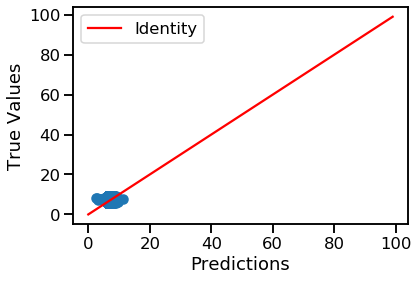

In [200]:
#Plot
plt.scatter(poly_svr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()
print(f'R2 score: {poly_svr_r2:.6f}')
print(f'MAE: {poly_svr_mse:.6f}')
print(f'MSE: {poly_svr_mae:.6f}')

In [201]:
#Guardamos
results_df = results_df.append({'Model':'SVR',
                                'Features':'Poly',
                                'R2':poly_svr_r2,
                                'MSE':poly_svr_mse,
                                'MAE':poly_svr_mae},ignore_index=True)

In [202]:
#Resultados finales
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Para acotar los decimales en pandas
display(results_df)

,Model,Features,R2,MSE,MAE
0,Linear,Lineal,0.042,0.436,0.534
1,Linear,Poly grado 4,0.165,0.380,0.472
2,Ridge,Lineal,0.001,0.455,0.545
3,Ridge,Poly,0.112,0.404,0.488
4,SVR,Linear,0.087,0.415,0.473
5,SVR,Poly,0.031,0.441,0.469


In [203]:
#Con un train test split de 60-40 tuvimos mejores resultados para linear poly grado 4
#Vamos a correr eso